# 20144753 선승엽
https://github.com/SYseon/assignment04

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Class Kmean
## -Variables
### self.n_cluster = 클러스터의 class 종류의 수
### self.data = data를 numpy array 타입으로 반환
### self.x = data에 있는 feature 의 값들을 반환
### self.assign_label = data가 어떤 class에 속하고 그 값에 따른 실제 레이블 값을 저장.
### self.real_label = x가 mnist의 어떤 레이블을 갖는 지 저장
### self.label_name = 분류된 label이 어떤 class를 대표하는 지 저장.
### self.centroid_coordinate = 각 label 들의 centroid를 저장.
### self.distance = 각각의 data가 해당 centorid로 부터의 거리를 저장.
### self.accuracy_arr, self.accuracy_score, self.n_sample, self.accuracy_score_mean = accuracy 계산에 이용.
### self.energy = 에너지 저장
### self.image = 이미지 출력에 이용

## -functions
### self.initialize_label = label을 랜덤 값들로 초기화 시킴.
### self.assign_label = label을 할당하고 각각의 최빈값들을 label의 대표값으로 지정
### self.compute_distance = data가 centroid로 부터 떨어진 거리를 측정하여 어떤 label과 가장 가까운 지 판단.
### self.compute_centroid = 해당 data로 평균 값을 구함.
### self.compute_accuracy = accuracy를 구함.


In [13]:
class KMeans():
    
    def __init__(self,data,n_cluster):
        self.n_cluster=n_cluster
        self.data=np.array(data)
        self.x=np.array(self.data.T[1:])
        self.x=self.x.T
        self.assign_label_arr=np.empty([self.data.shape[0], self.n_cluster])
        self.real_label=np.array(self.data.T[0])
        self.x_label=np.array(self.x.shape[0])
        self.label_name=np.empty(self.n_cluster)
        self.centroid_coordinate=np.zeros([self.n_cluster, self.x.shape[1]]) 
        self.distance=np.empty(self.x.shape[0])
        self.accuracy_arr=np.zeros(self.n_cluster)
        self.accuracy_score=np.zeros(self.n_cluster)
        self.n_sample=np.zeros(self.n_cluster)
        self.energy=np.empty(self.x.shape[0])
        self.initialize_label()
        self.accuracy_score_mean=0
        self.image=np.array(self.x).reshape([self.x.shape[0],28,28])
        
    def initialize_label(self):
        self.x_label=np.random.randint(0, self.n_cluster, self.x_label)
        self.assign_label()
        
    def assign_label(self):
        for i in range(self.n_cluster):
            temp=np.isclose(i, self.x_label)
            self.n_sample[i]=temp.sum()
            self.assign_label_arr.T[i]=np.where(temp, self.real_label, np.nan)
            
        a=np.array(stats.mode(self.assign_label_arr, nan_policy='omit'))
        self.label_name=a[0][0]
        self.accuracy_arr=a[1][0]
     

    def compute_centroid(self):
        k=0
        for i in range(self.n_cluster):
            for j in range(self.x.shape[0]):
                if not np.isnan(self.assign_label_arr.T[i][j]):
                      self.centroid_coordinate[i] = self.centroid_coordinate[i] + self.x[j]
                      k+=1
            if k==0:
                k=1
            self.centroid_coordinate[i] = self.centroid_coordinate[i]/k
        
        self.compute_distance()
        
    def compute_distance(self):
        temp=np.empty([self.x.shape[0], self.n_cluster])
        for i in range(self.x.shape[0]):
            for j in range(self.n_cluster):
                temp[i][j]=(((self.x[i]-self.centroid_coordinate[j])**2).sum())**(1/2)
                if j>0 and temp[i][j-1]>temp[i][j]:
                    self.x_label[i]=j
                    self.distance[i]=temp[i][j]
        self.assign_label()
                    
                     
    def compute_accuracy(self):
        temp=np.zeros(self.n_cluster)
        temp1=self.accuracy_score_mean
        k=0
        for i in range(self.n_cluster):
            temp[i] = self.accuracy_arr[i]/self.n_sample[i]
            if not np.isnan(temp[i]):
                k+=1
                self.accuracy_score_mean = self.accuracy_score_mean + temp[i]
            else:
                self.accuracy_score_mean=temp1
                return False
        if k==0:
            k=1
        self.accuracy_score_mean = self.accuracy_score_mean/k
        if np.all(abs(temp1-self.accuracy_score_mean)<0.00001 or self.accuracy_score_mean-temp1<-0.03):
            self.accuracy_score_mean=temp1
            return False
        else:
            self.accuracy_score = temp
            return True
        
    
    def compute_energy(self, i):
        if i==0:
            self.energy=self.distance.sum()
        else:
            self.energy=self.distance.sum()-self.energy
        
        return self.energy
    
    
    def show_image(self):
        for i in range(self.n_cluster):
            print('\n\n\n *',i+1,'th cluster')
            print('accuracy score of this cluster:',self.accuracy_score[i])
            print('This cluster is classified as [',int(self.label_name[i]),']')
            for j in range(150):
                if not np.isnan(self.assign_label_arr[j][i]):
                    plt.imshow(self.image[j],cmap='Greys')
                    plt.show()


    def activate(self):
        self.i=0
        temp=(True,True)
        while(all(temp)):
            self.compute_centroid()
            print('##########################',self.i+1,'iteration##########################')
            print(self.i+1,'th iteration of energy :',self.compute_energy(self.i))
            temp=(self.compute_accuracy(), self.energy>0)
            print(self.i+1,'th iteration of accuracy score :',self.accuracy_score_mean)
            print(self.i+1,'th iteration of centroid :',self.centroid_coordinate)
            self.show_image()
            self.i+=1
    
    

########################## 1 iteration##########################
1 th iteration of energy : 3066845.0485168425
1 th iteration of accuracy score : 0.14175310034213562
1 th iteration of centroid : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



 * 1 th cluster
accuracy score of this cluster: 0.1255980861244019
This cluster is classified as [ 9 ]


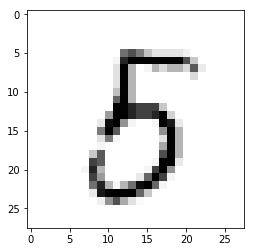

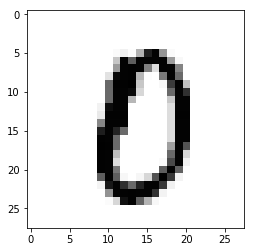

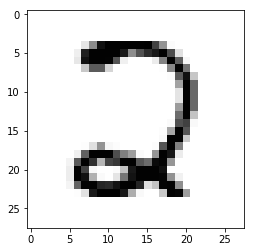

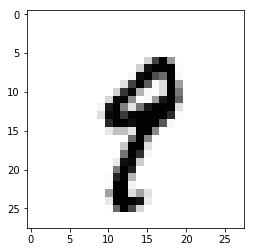

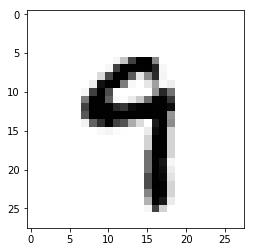

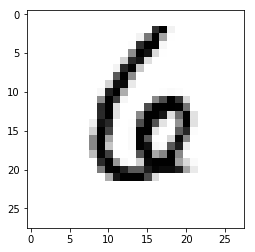

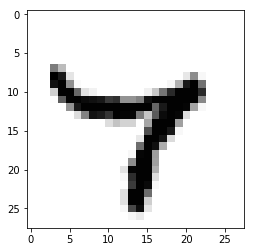

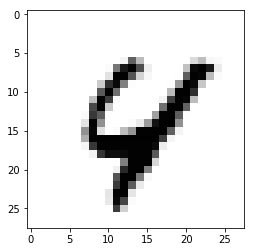

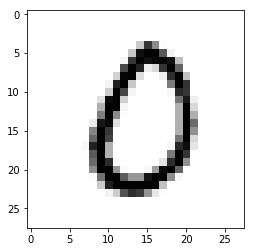




 * 2 th cluster
accuracy score of this cluster: 0.28223125230882895
This cluster is classified as [ 1 ]


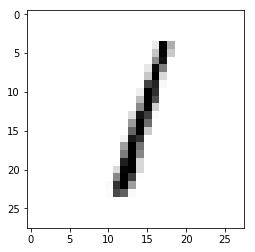

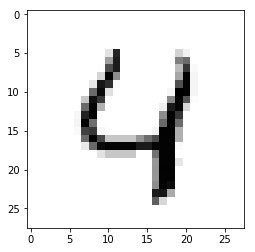

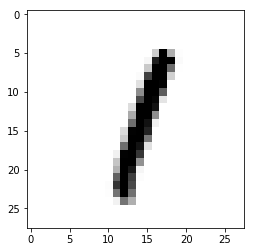

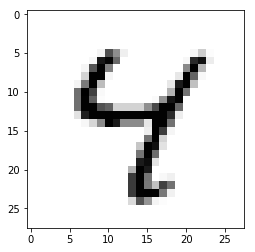

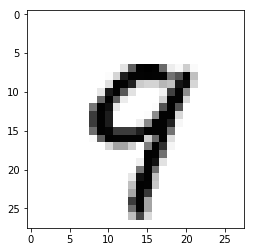

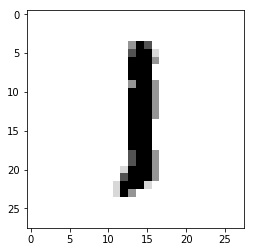

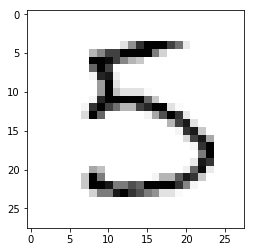

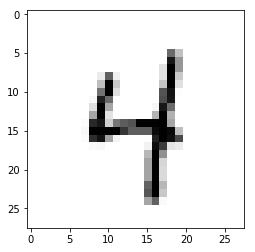

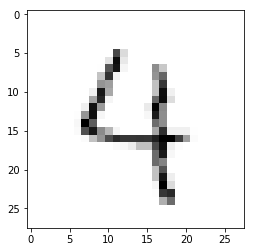

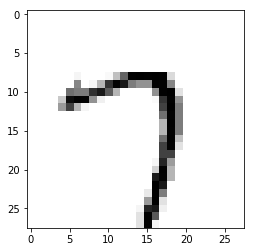

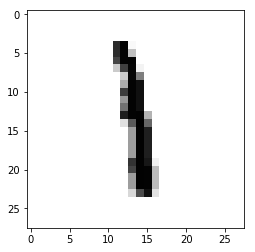

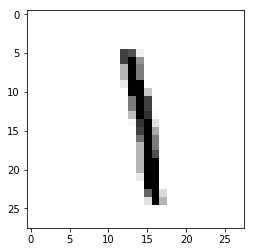

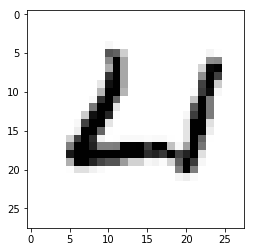

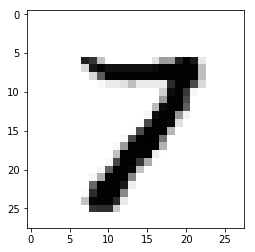

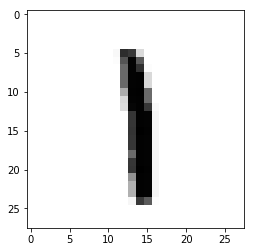

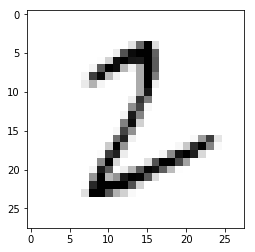

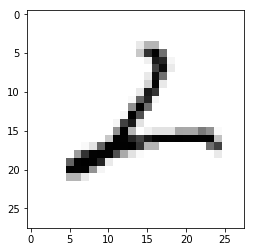

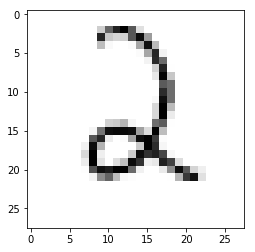

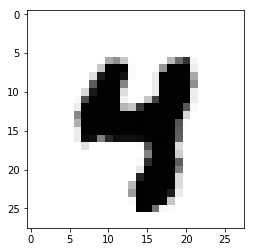

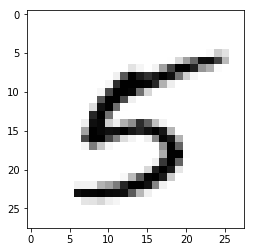

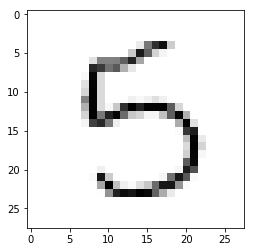

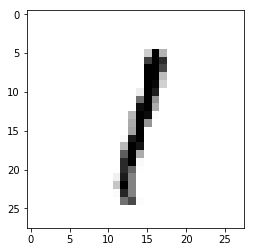

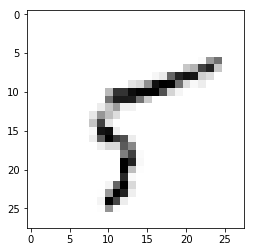

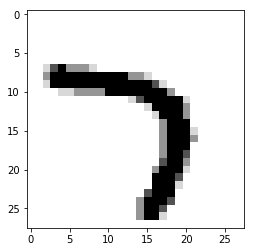

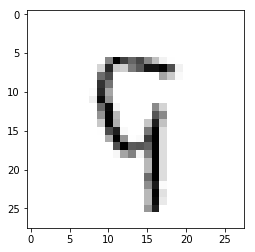

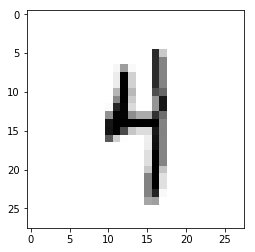

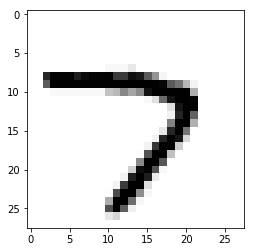

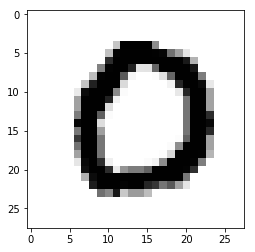

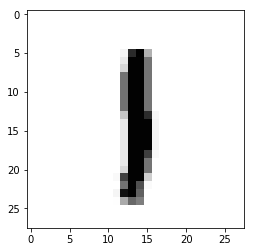

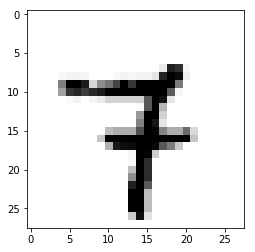

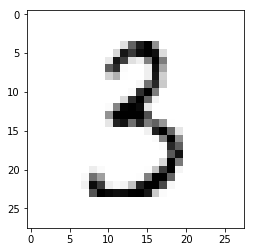

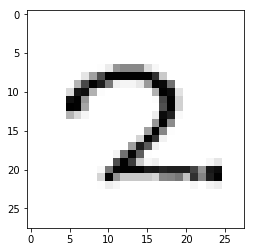

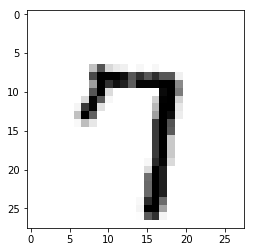

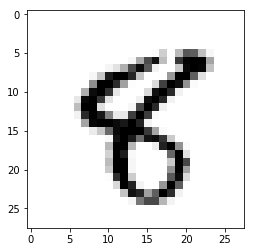

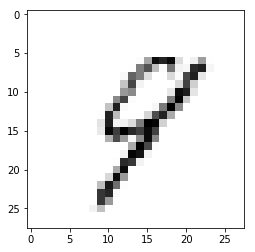

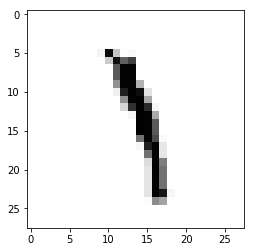

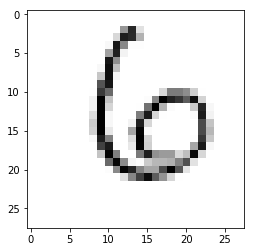

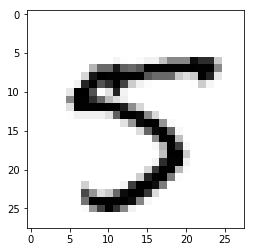

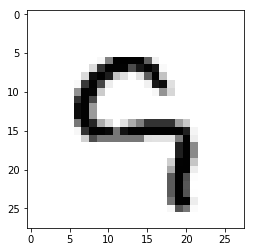

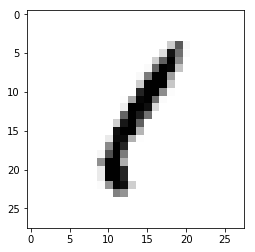

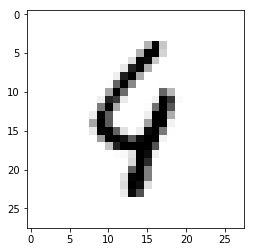

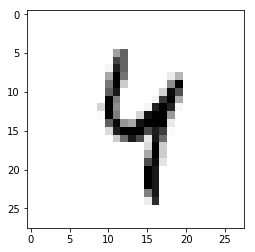

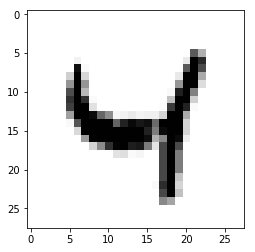

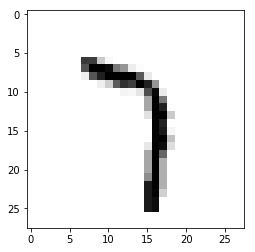

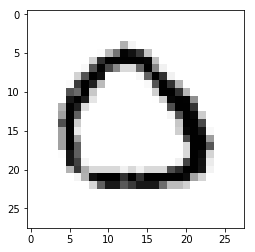

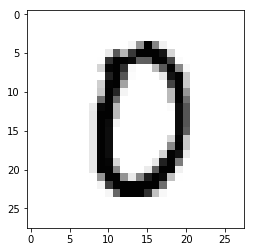

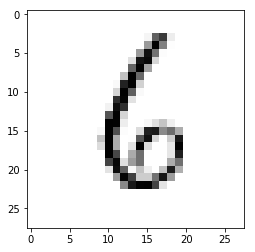

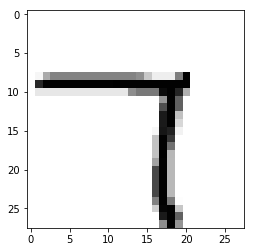

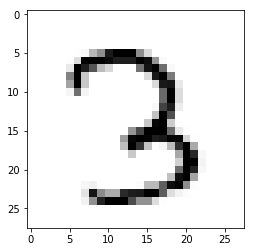

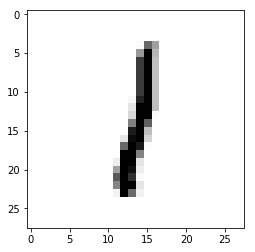

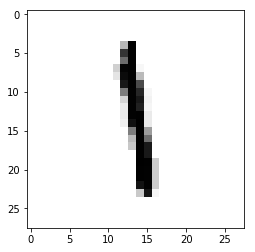

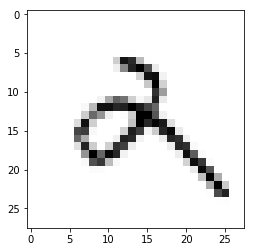

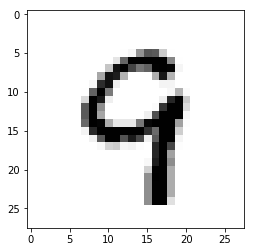




 * 3 th cluster
accuracy score of this cluster: 0.12484700122399021
This cluster is classified as [ 1 ]


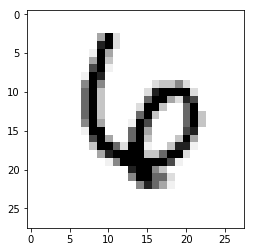

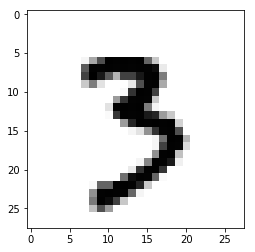

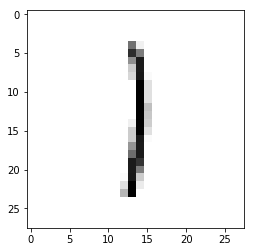

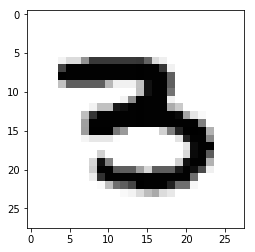

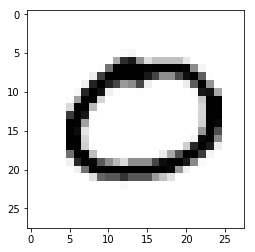

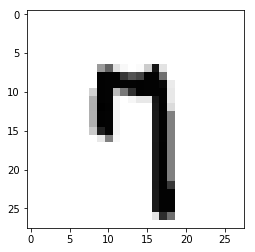

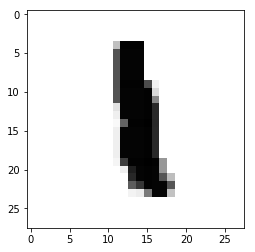

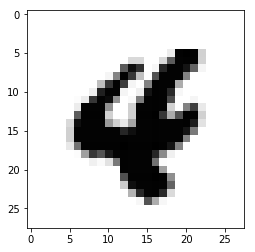

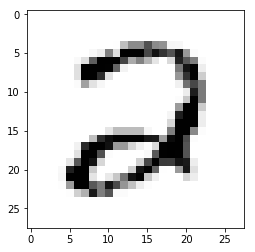

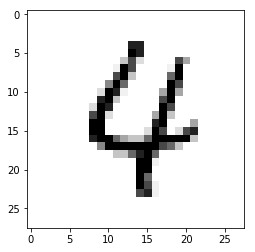

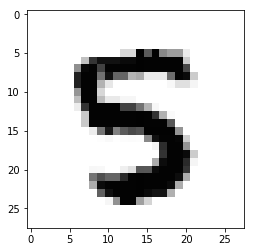

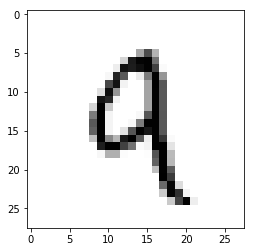




 * 4 th cluster
accuracy score of this cluster: 0.13647342995169082
This cluster is classified as [ 9 ]


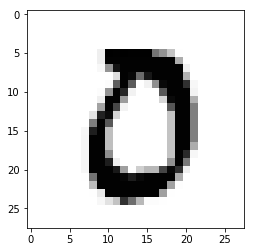

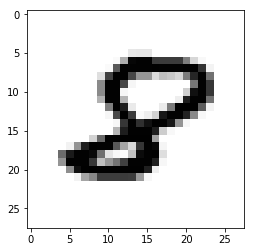

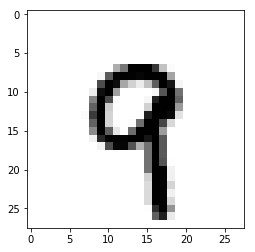

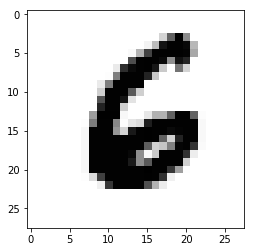

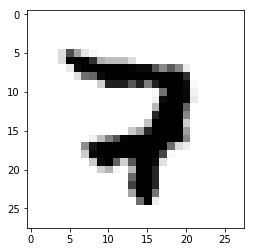

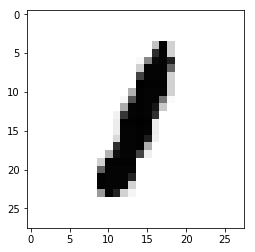




 * 5 th cluster
accuracy score of this cluster: 0.12033694344163658
This cluster is classified as [ 8 ]


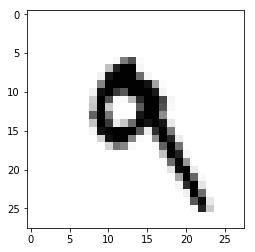

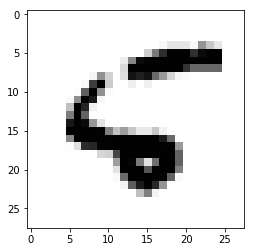

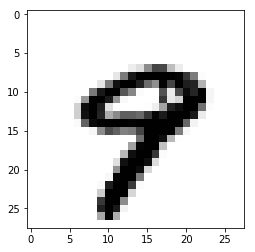

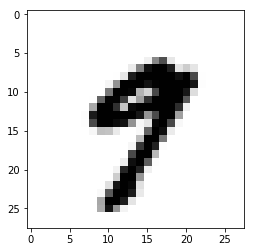

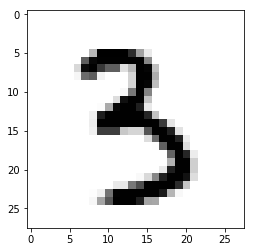

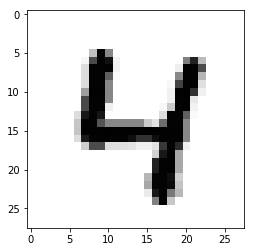

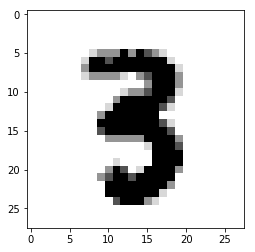

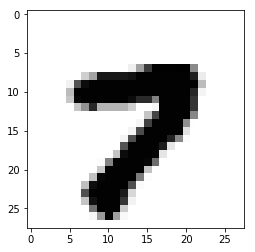

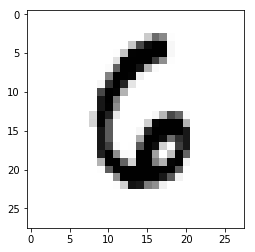

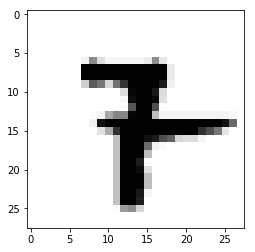

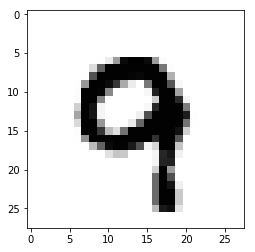

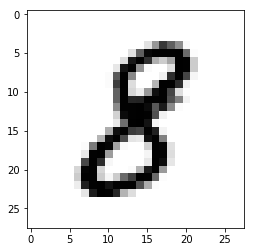

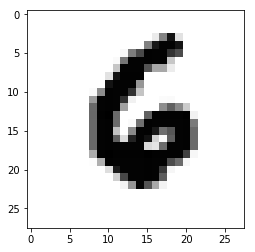

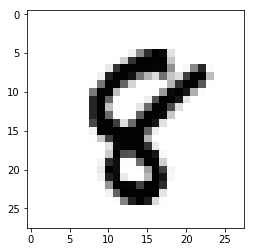




 * 6 th cluster
accuracy score of this cluster: 0.1308641975308642
This cluster is classified as [ 2 ]


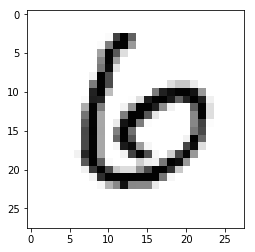

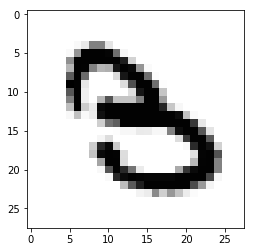

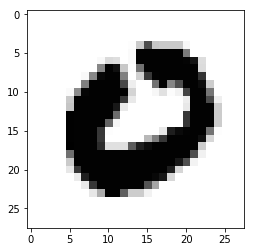

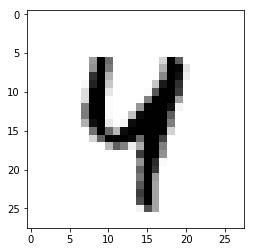

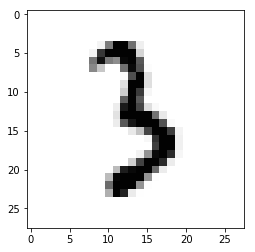

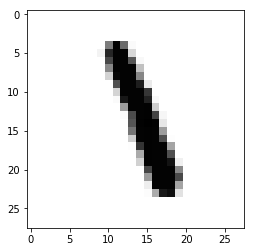

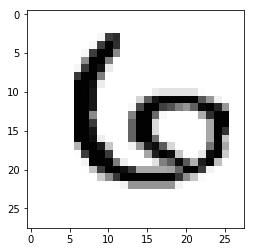

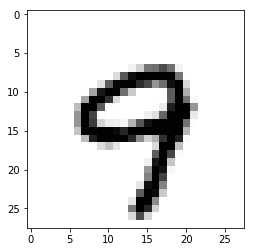

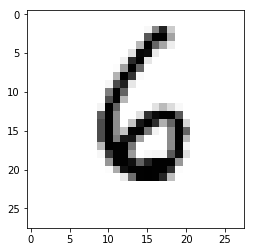

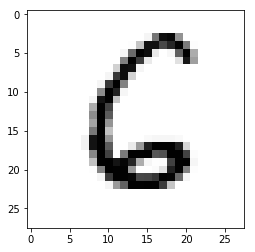

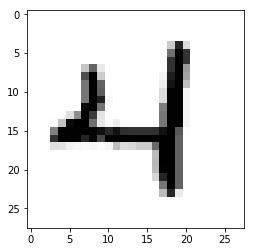

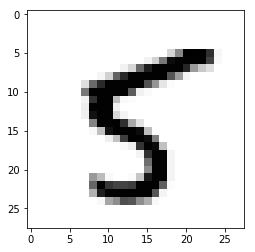

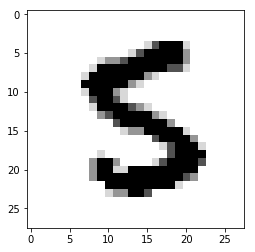

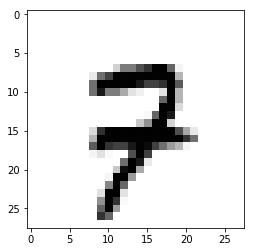




 * 7 th cluster
accuracy score of this cluster: 0.12594458438287154
This cluster is classified as [ 8 ]


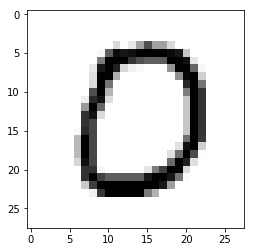

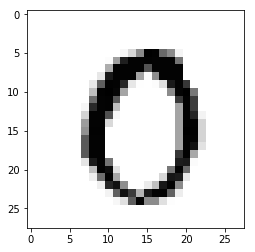

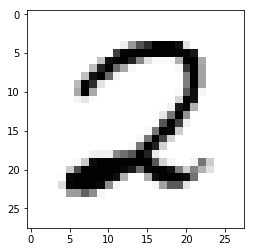

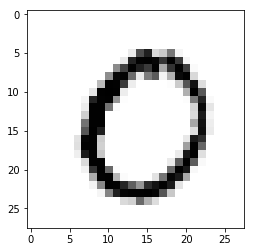

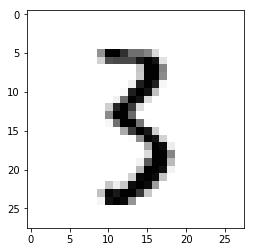

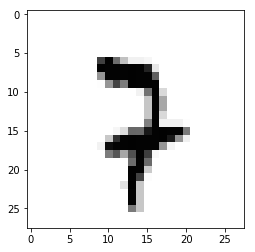

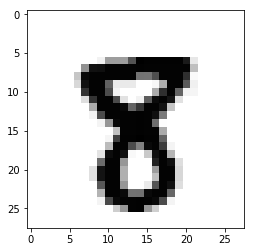

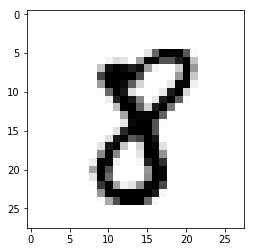

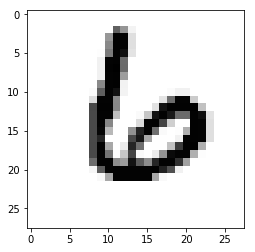




 * 8 th cluster
accuracy score of this cluster: 0.12359550561797752
This cluster is classified as [ 6 ]


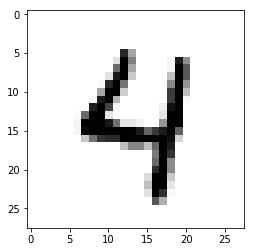

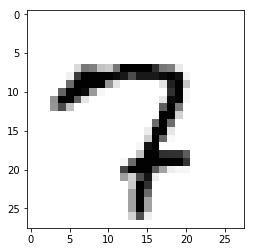

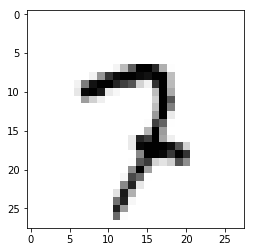

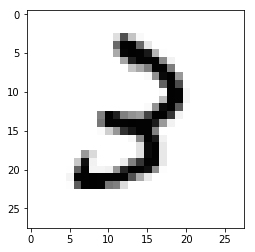

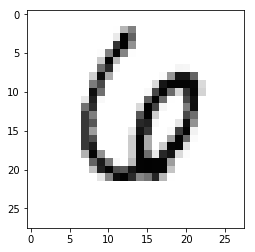

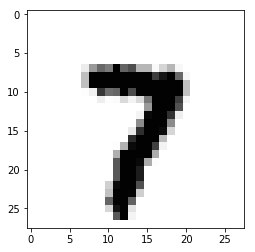

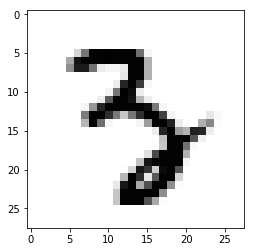

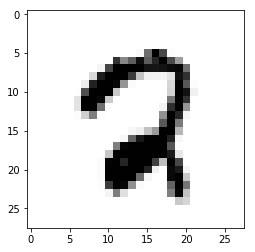

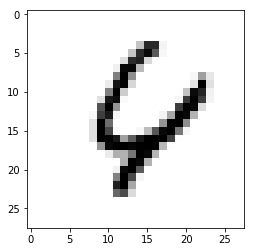

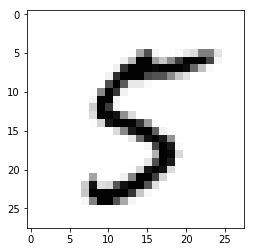




 * 9 th cluster
accuracy score of this cluster: 0.12435233160621761
This cluster is classified as [ 0 ]


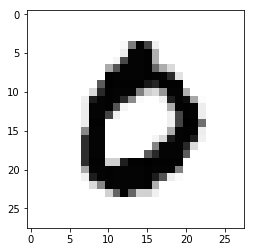

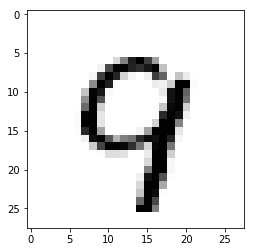

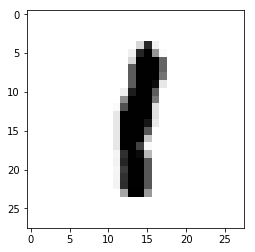

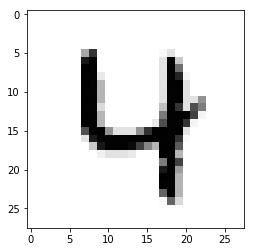

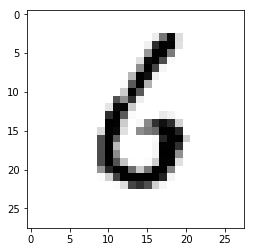

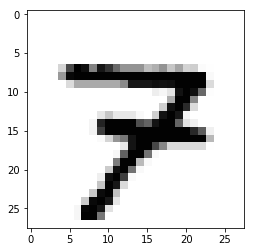

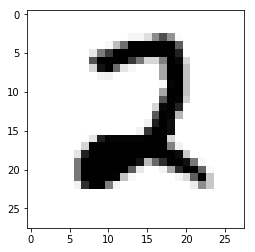

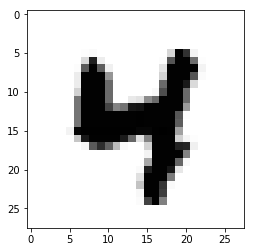

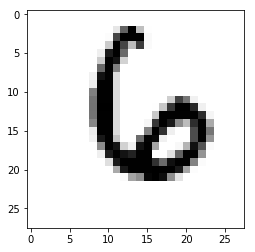

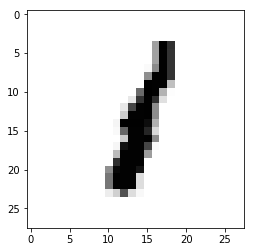

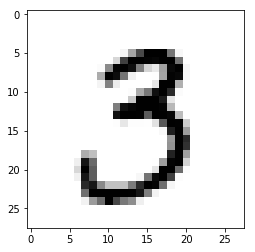

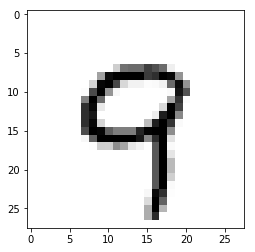

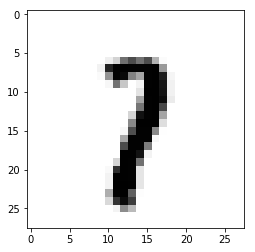

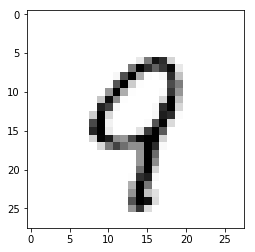




 * 10 th cluster
accuracy score of this cluster: 0.1232876712328767
This cluster is classified as [ 8 ]


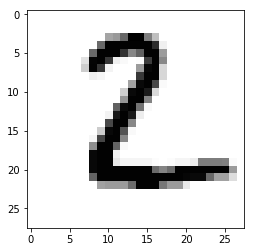

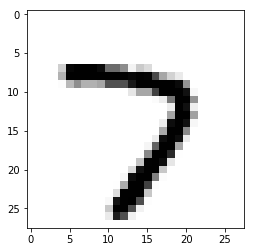

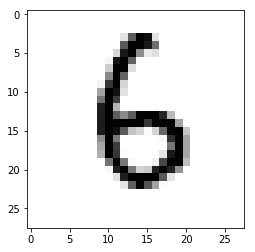

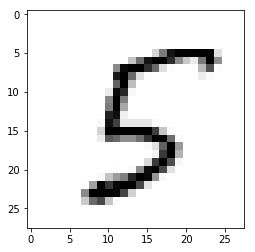

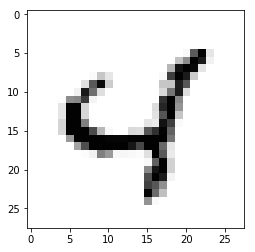

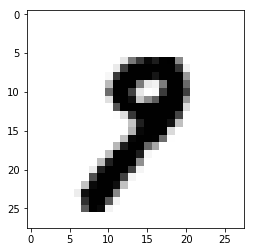

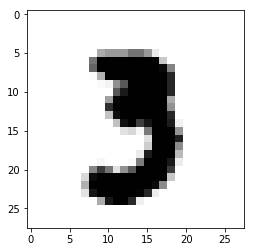

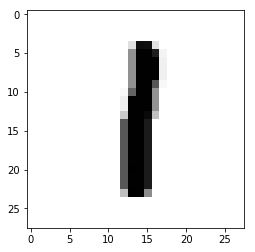

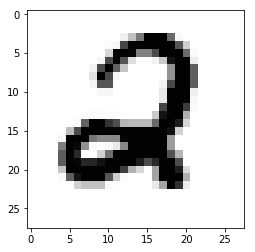

########################## 2 iteration##########################
2 th iteration of energy : 1756129.7966265175
2 th iteration of accuracy score : 0.16386509650995285
2 th iteration of centroid : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



 * 1 th cluster
accuracy score of this cluster: 0.13324175824175824
This cluster is classified as [ 9 ]


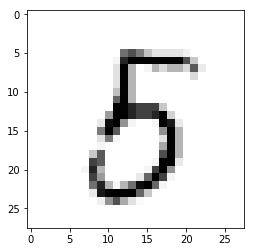

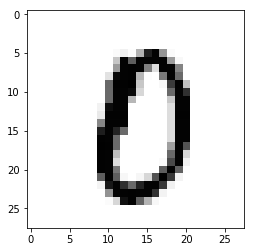

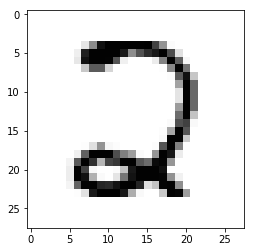

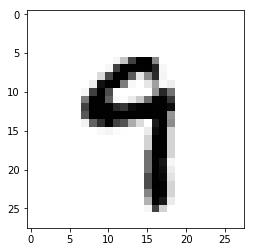

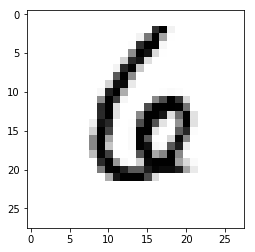

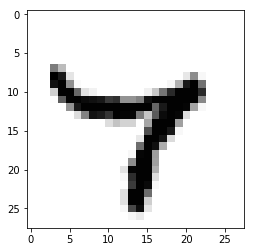

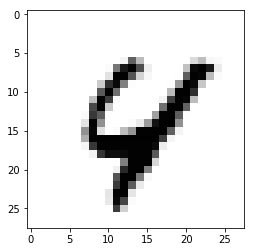

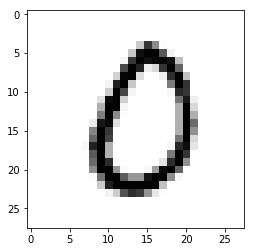




 * 2 th cluster
accuracy score of this cluster: 0.28491021173948006
This cluster is classified as [ 1 ]


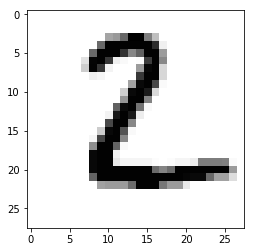

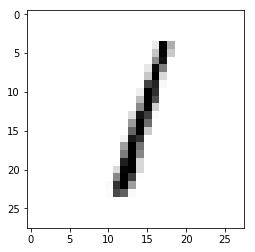

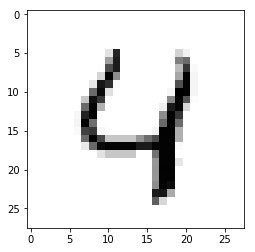

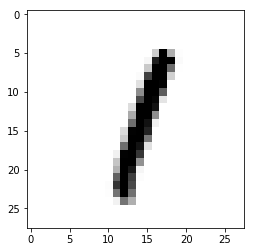

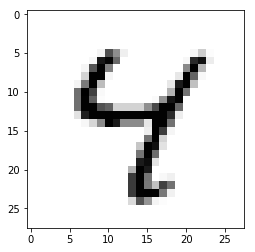

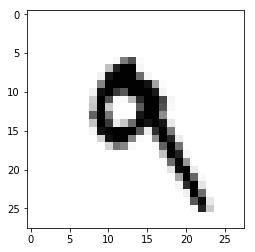

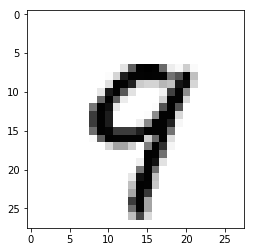

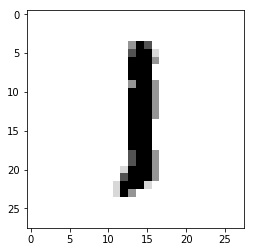

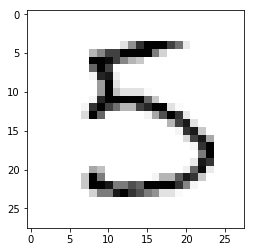

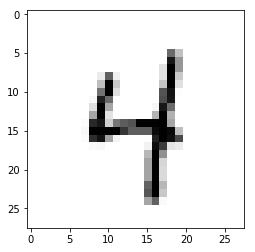

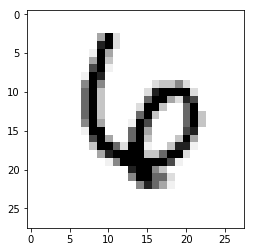

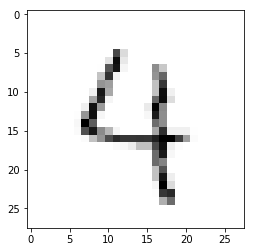

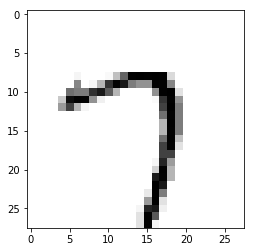

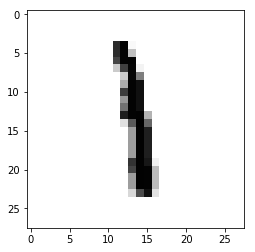

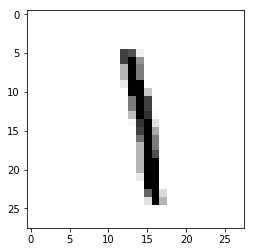

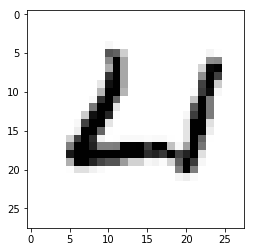

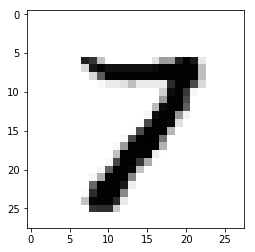

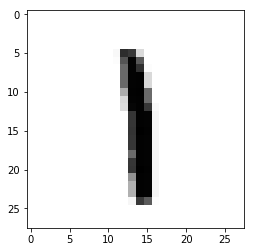

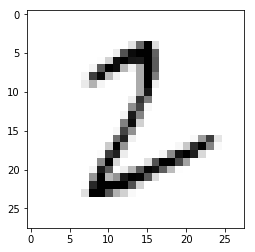

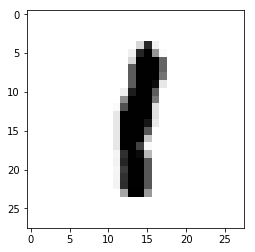

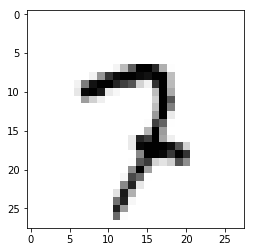

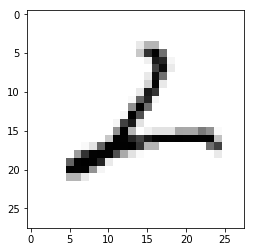

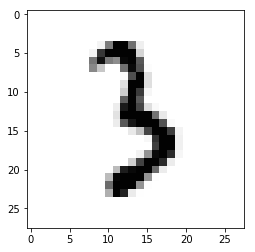

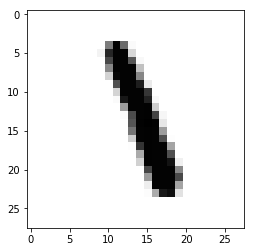

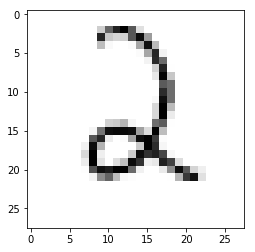

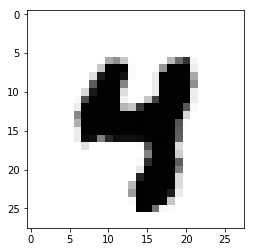

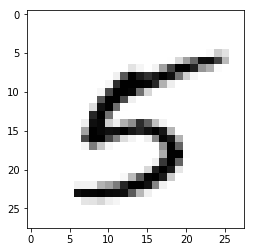

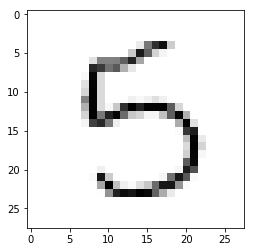

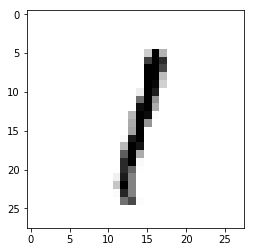

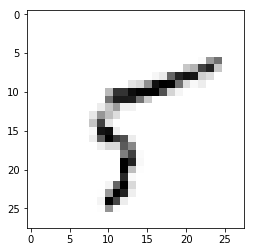

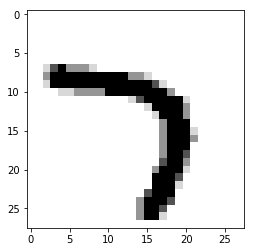

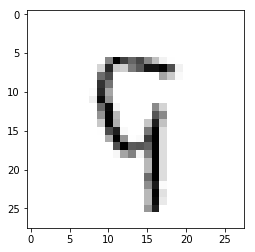

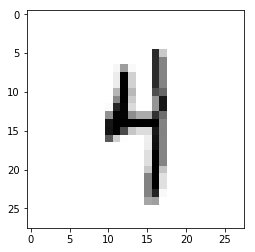

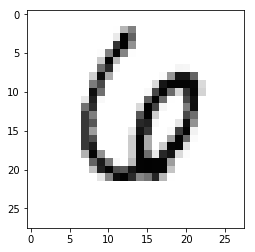

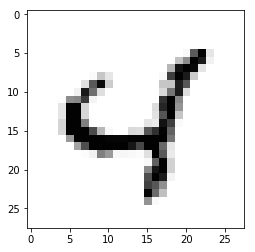

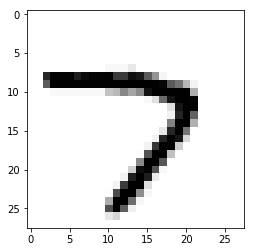

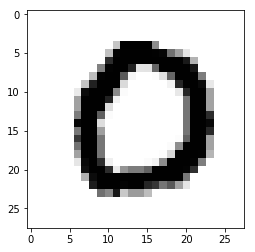

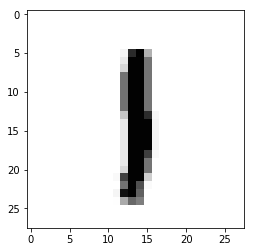

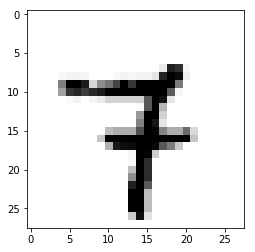

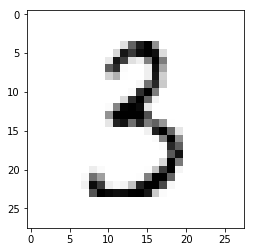

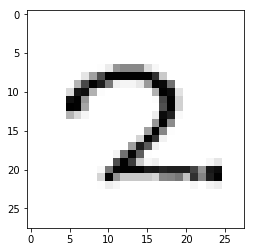

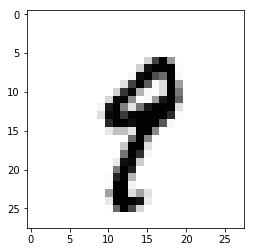

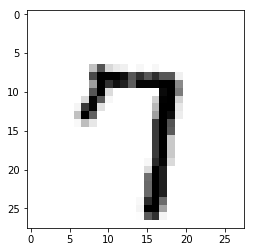

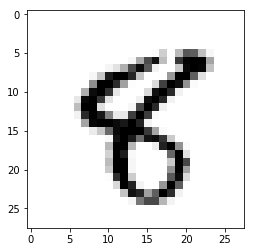

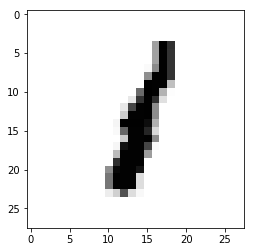

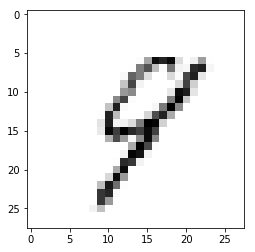

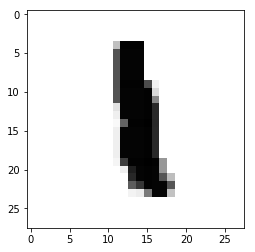

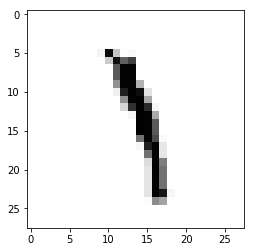

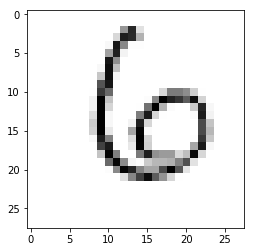

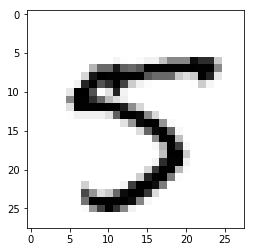

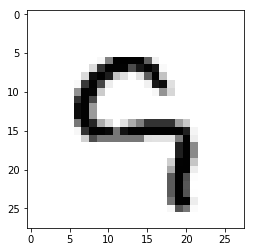

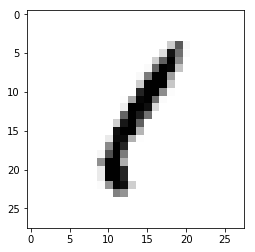

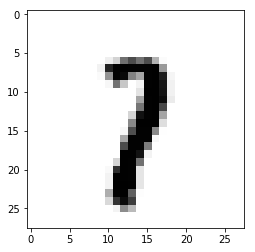

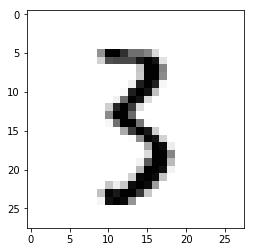

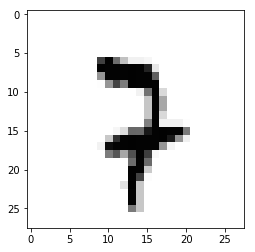

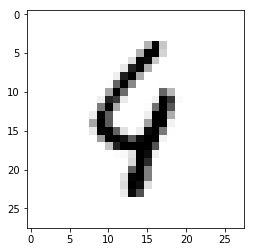

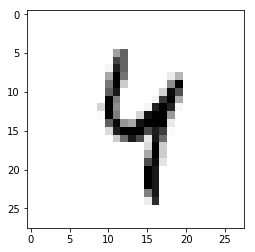

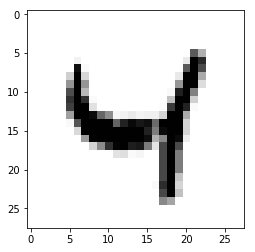

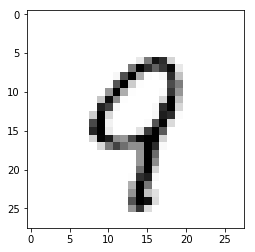

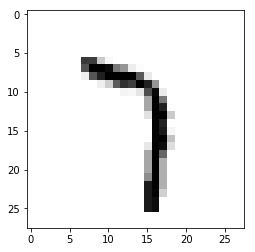

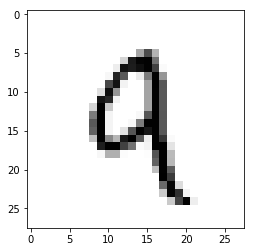

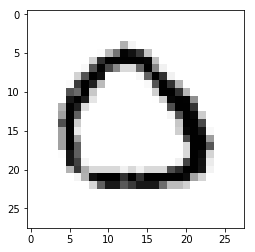

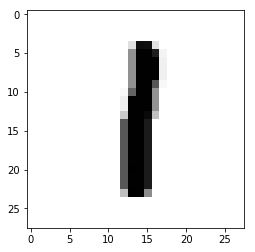

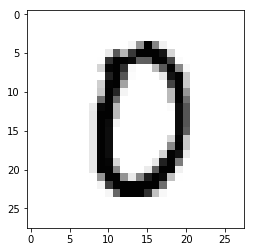

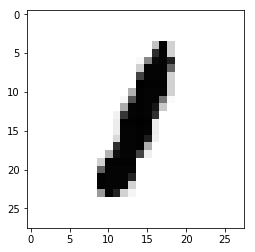

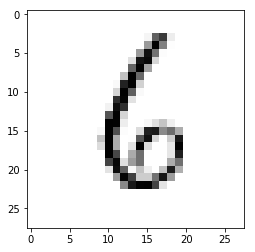

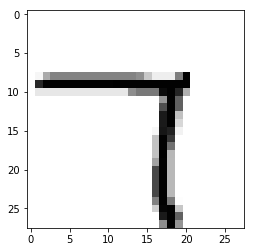

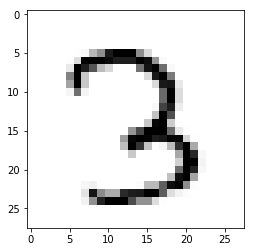

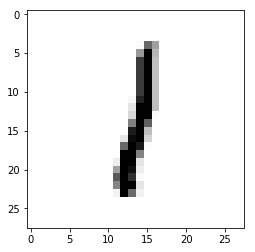

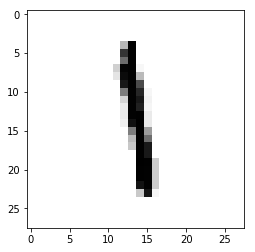

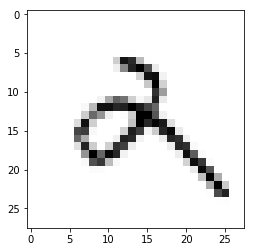

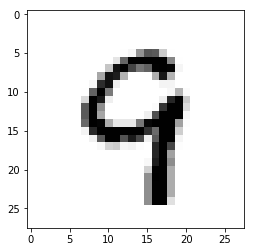




 * 3 th cluster
accuracy score of this cluster: 0.12480499219968799
This cluster is classified as [ 2 ]


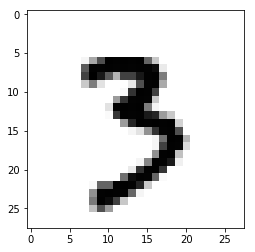

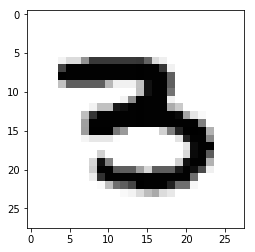

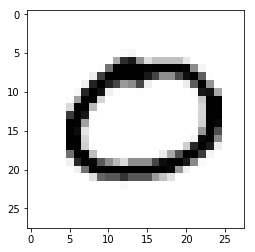

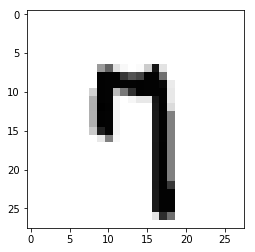

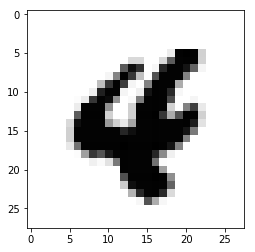

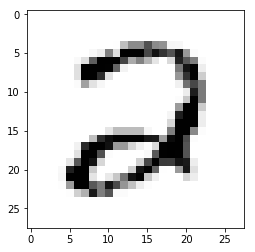

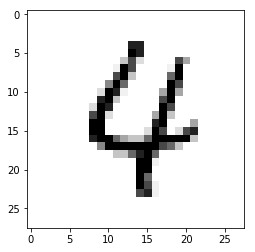

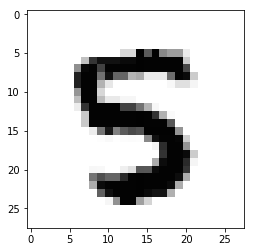




 * 4 th cluster
accuracy score of this cluster: 0.14147018030513175
This cluster is classified as [ 9 ]


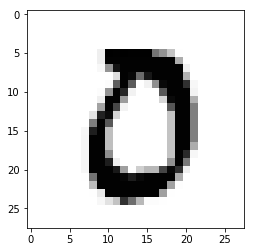

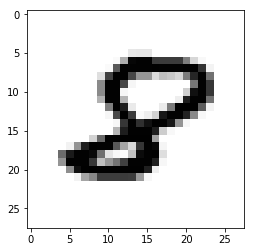

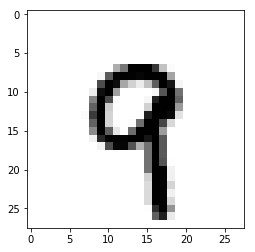

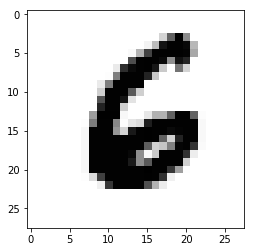

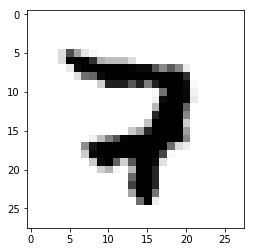




 * 5 th cluster
accuracy score of this cluster: 0.12751677852348994
This cluster is classified as [ 8 ]


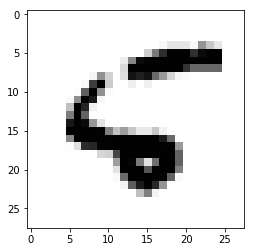

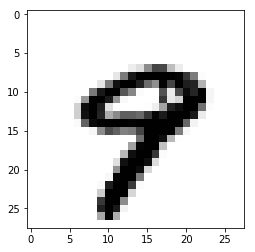

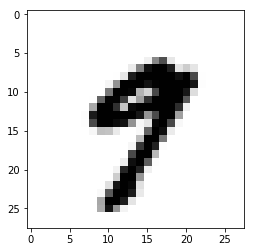

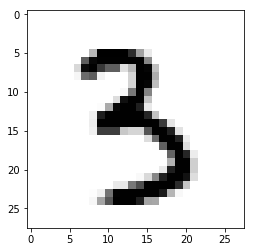

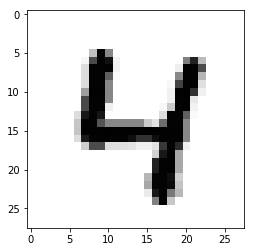

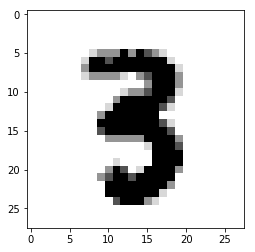

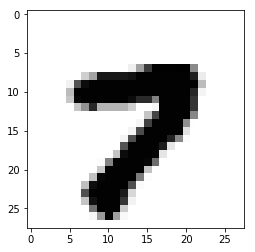

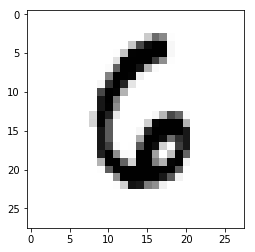

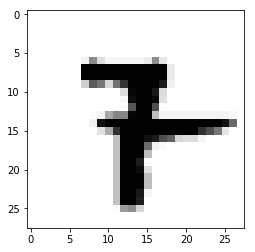

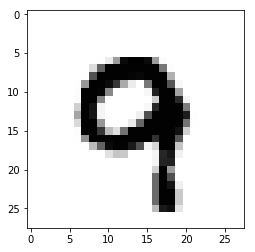

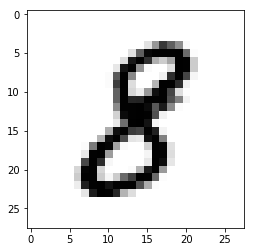

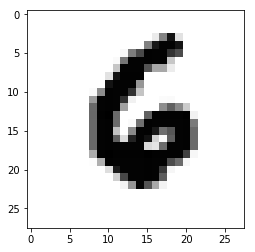

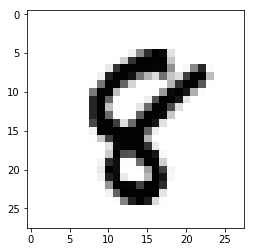




 * 6 th cluster
accuracy score of this cluster: 0.134180790960452
This cluster is classified as [ 0 ]


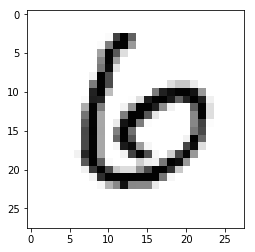

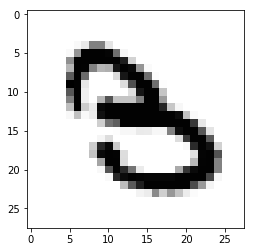

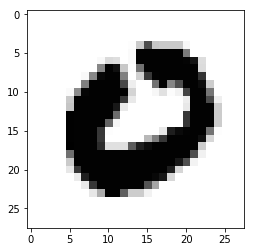

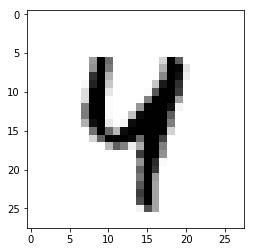

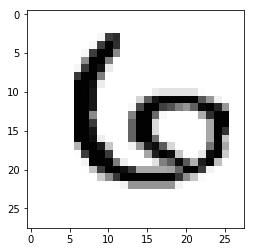

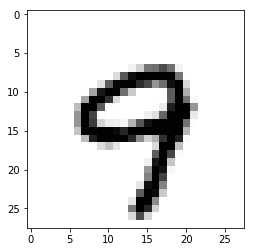

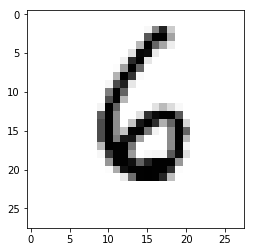

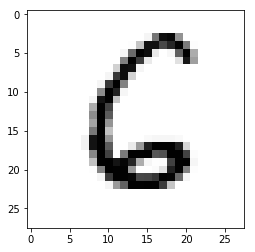

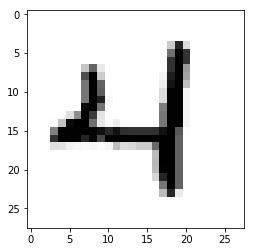

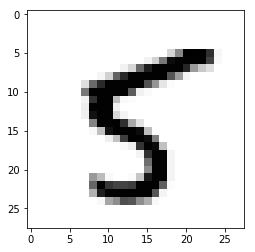

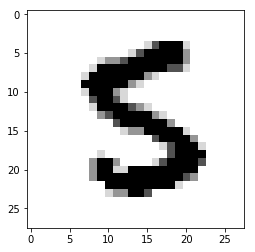

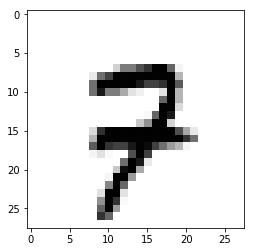




 * 7 th cluster
accuracy score of this cluster: 0.13991163475699558
This cluster is classified as [ 0 ]


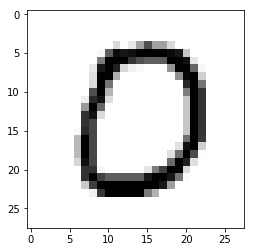

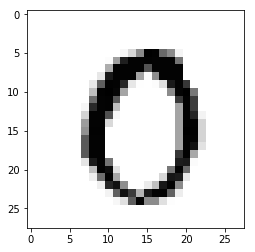

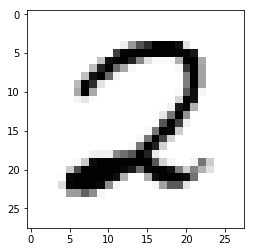

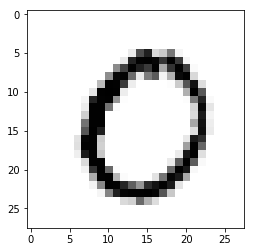

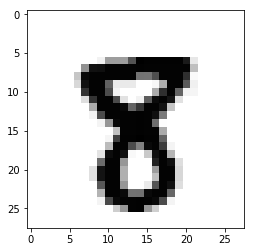

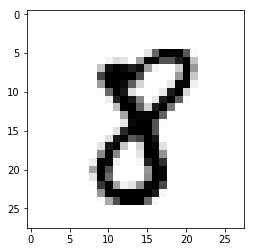

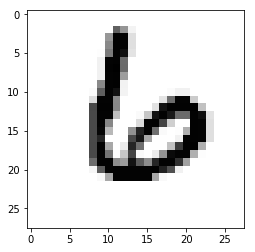




 * 8 th cluster
accuracy score of this cluster: 0.13544668587896252
This cluster is classified as [ 6 ]


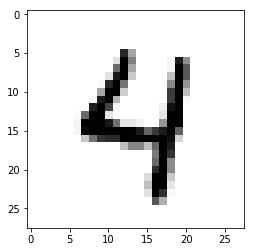

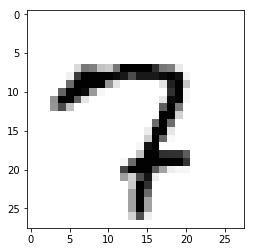

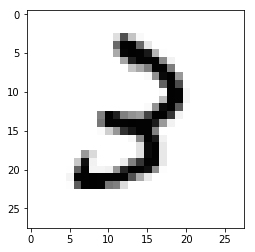

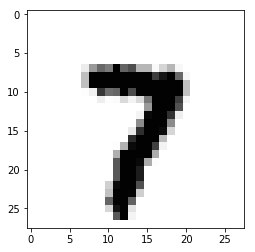

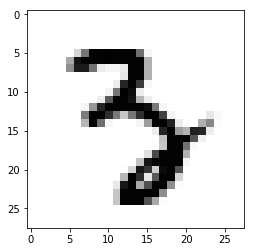

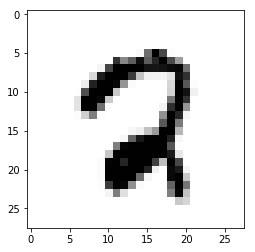

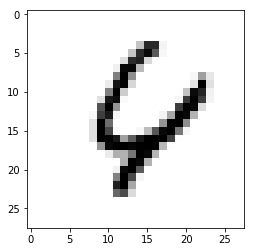

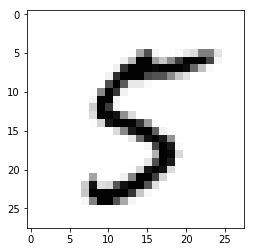




 * 9 th cluster
accuracy score of this cluster: 0.1437216338880484
This cluster is classified as [ 0 ]


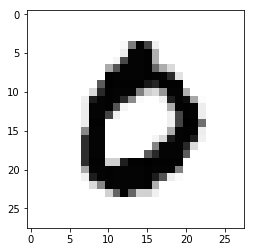

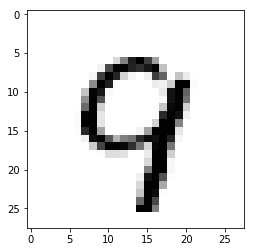

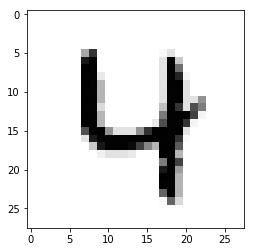

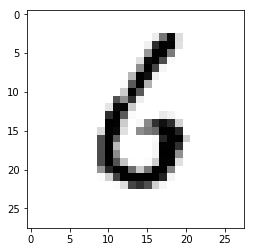

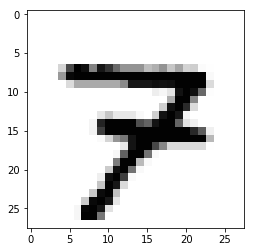

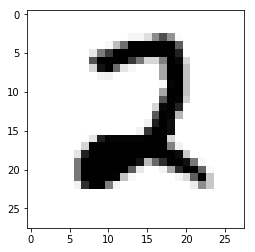

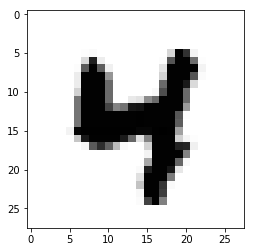

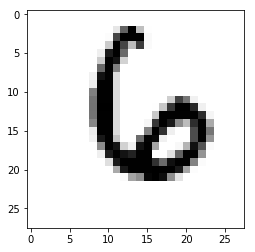

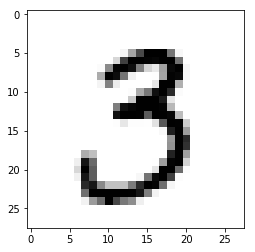

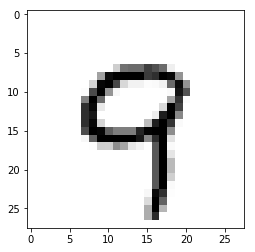




 * 10 th cluster
accuracy score of this cluster: 0.1316931982633864
This cluster is classified as [ 8 ]


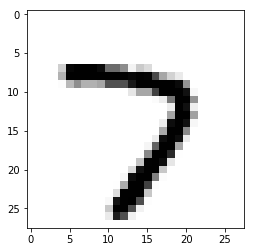

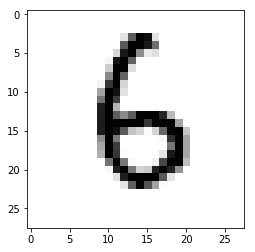

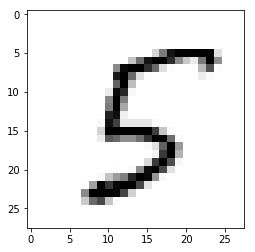

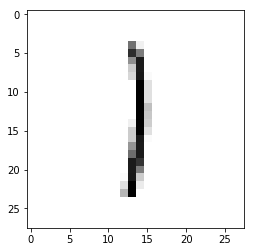

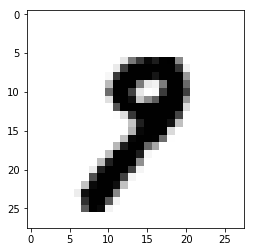

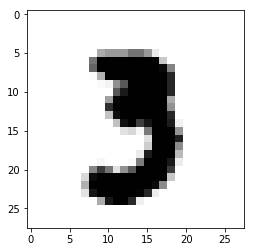

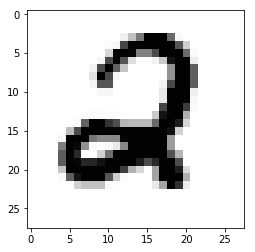

########################## 3 iteration##########################
3 th iteration of energy : 16614715.942137068
3 th iteration of accuracy score : 0.34377753782097664
3 th iteration of centroid : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



 * 1 th cluster
accuracy score of this cluster: 0.2642857142857143
This cluster is classified as [ 2 ]


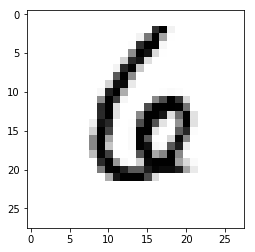




 * 2 th cluster
accuracy score of this cluster: 0.40226489414081734
This cluster is classified as [ 1 ]


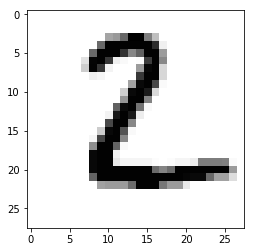

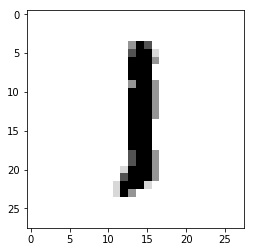

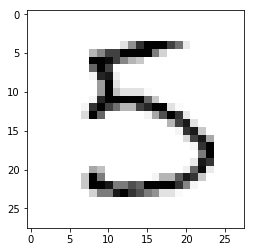

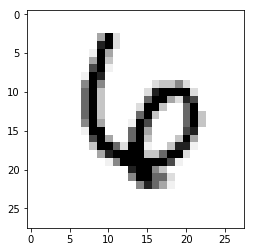

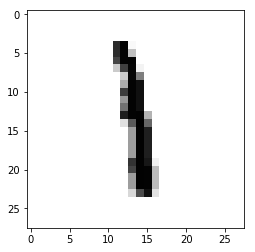

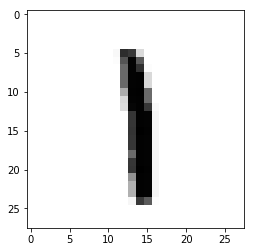

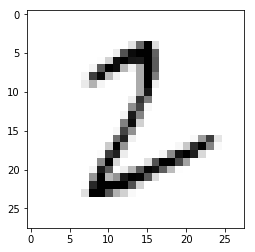

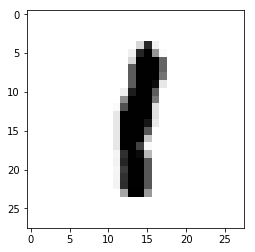

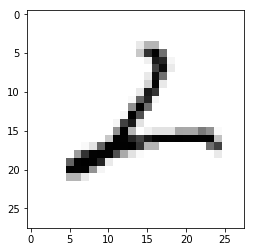

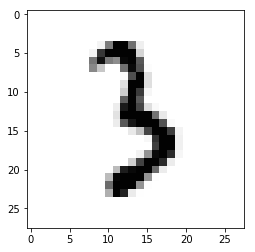

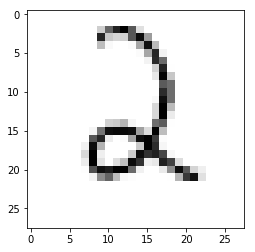

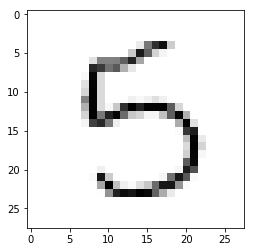

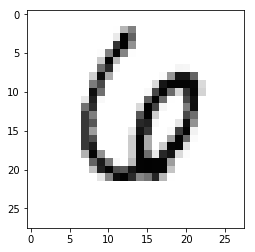

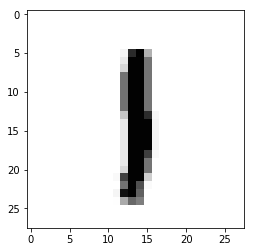

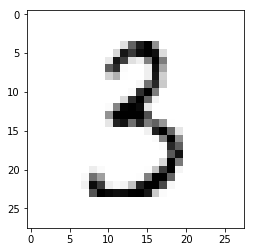

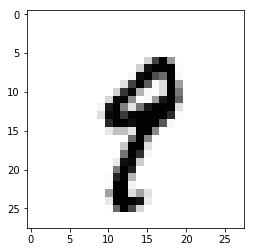

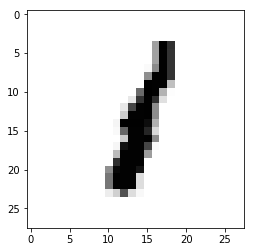

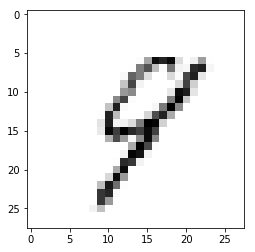

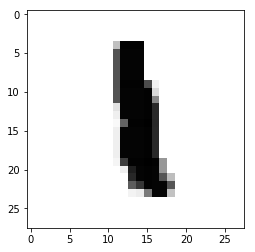

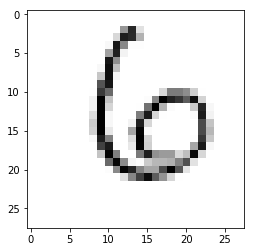

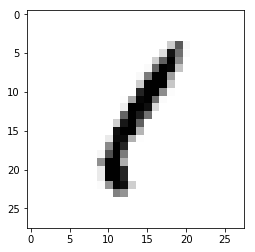

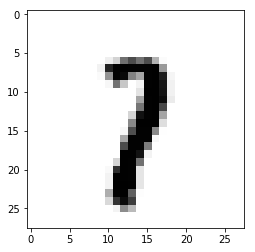

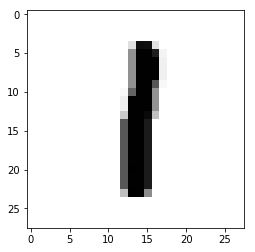

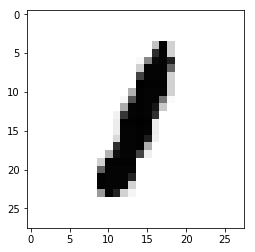

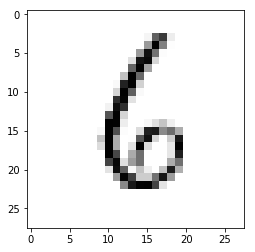

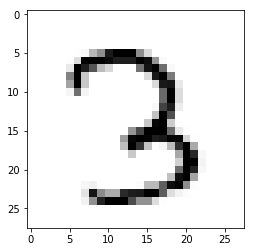

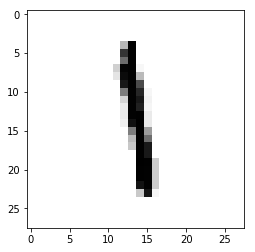

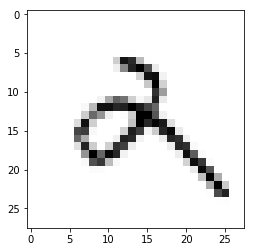




 * 3 th cluster
accuracy score of this cluster: 0.2676056338028169
This cluster is classified as [ 2 ]



 * 4 th cluster
accuracy score of this cluster: 0.14897522178036096
This cluster is classified as [ 0 ]


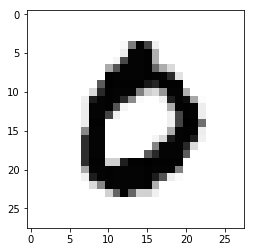

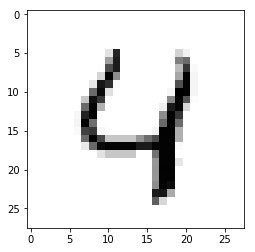

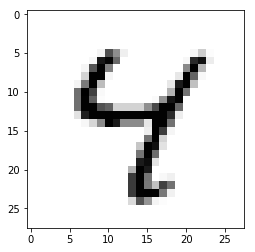

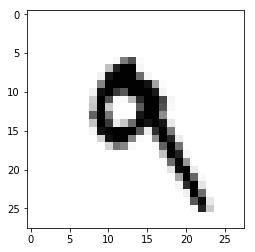

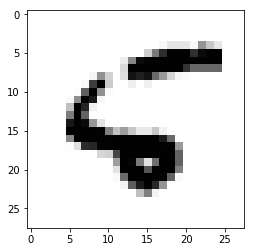

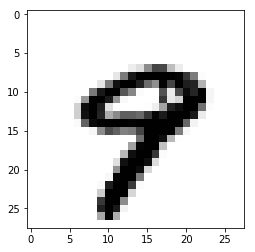

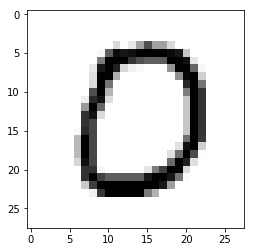

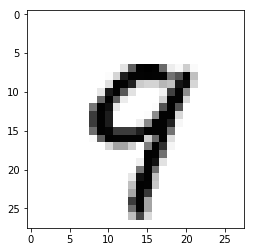

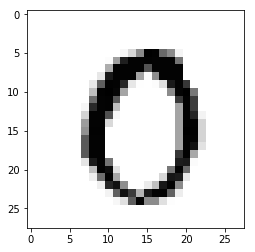

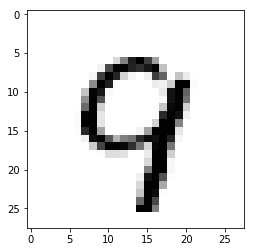

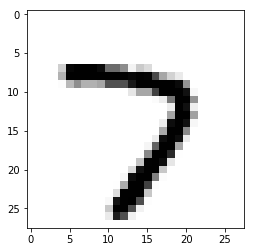

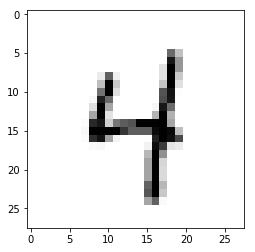

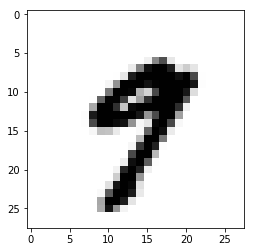

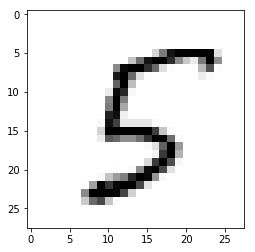

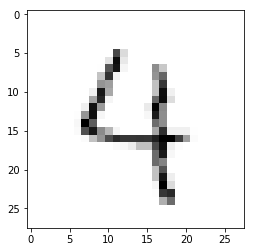

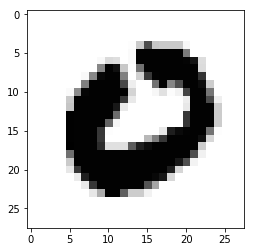

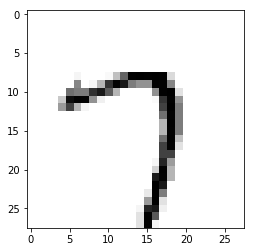

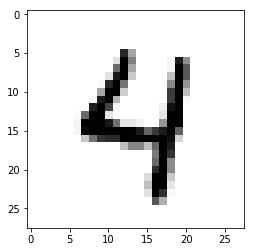

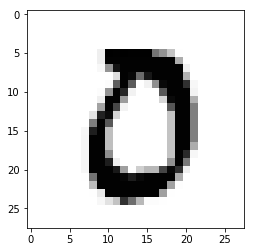

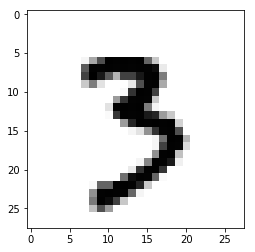

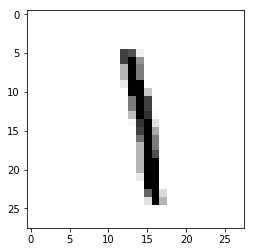

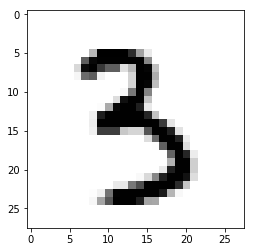

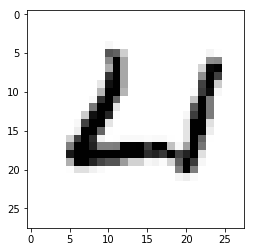

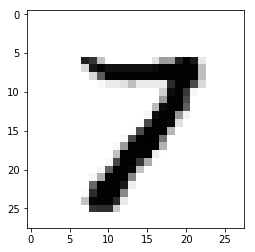

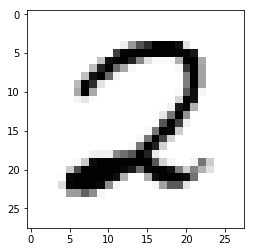

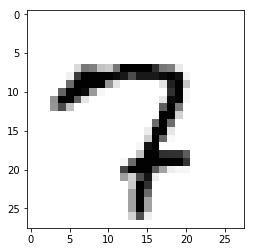

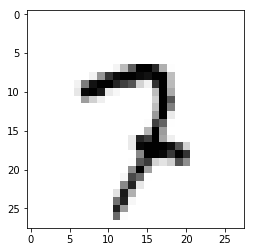

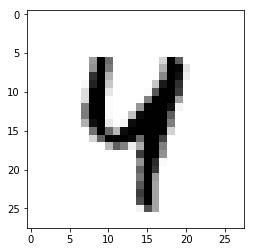

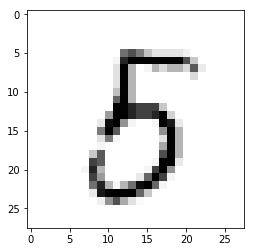

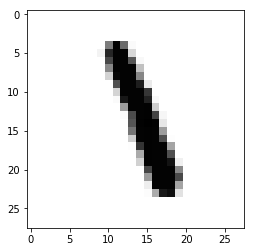

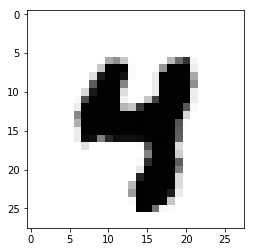

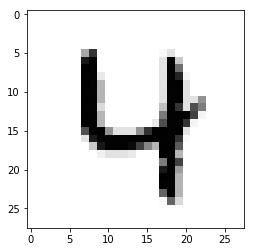

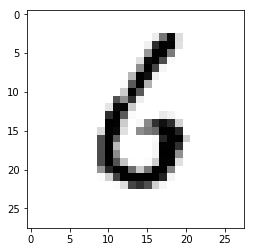

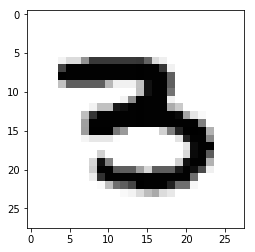

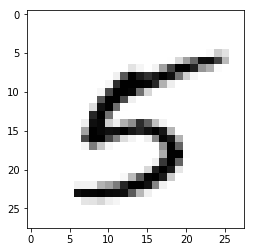

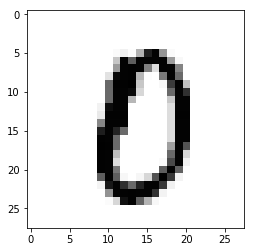

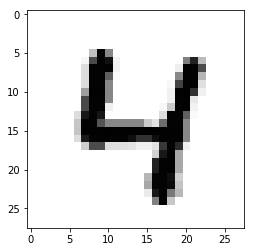

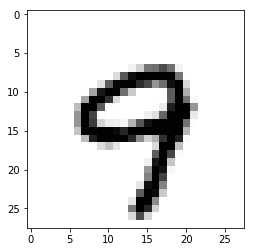

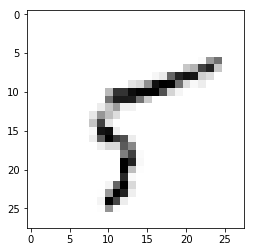

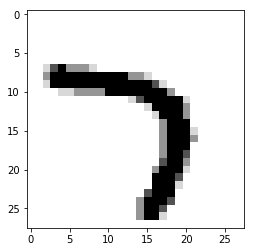

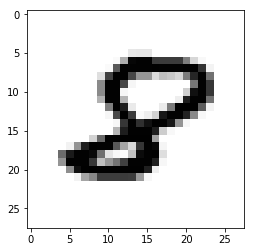

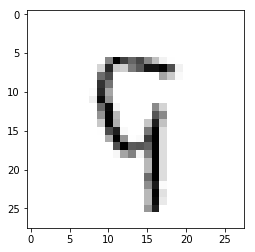

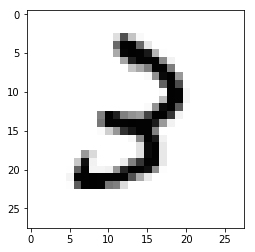

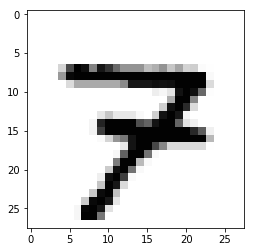

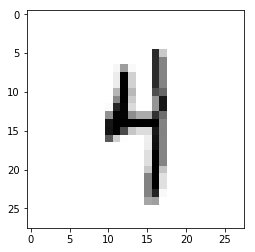

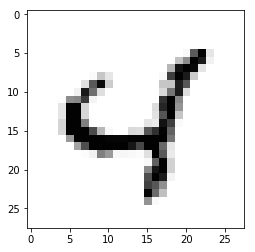

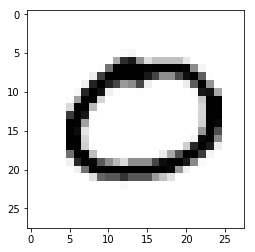

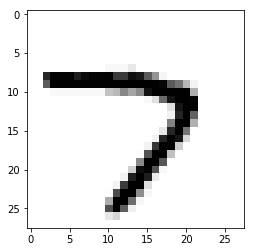

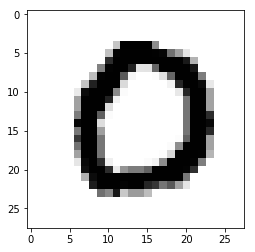

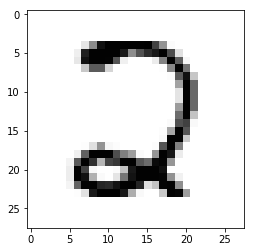

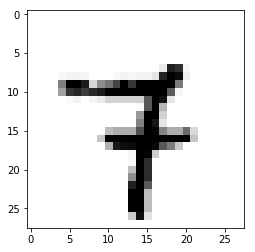

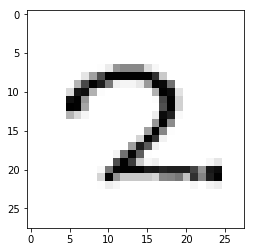

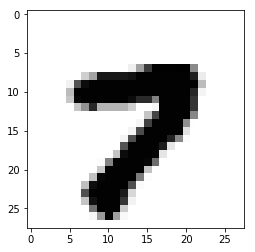

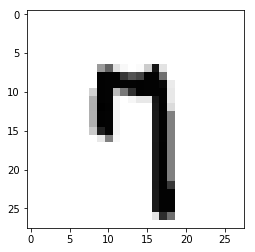

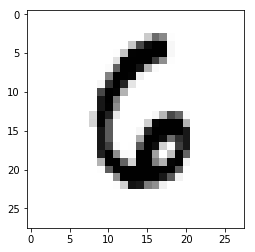

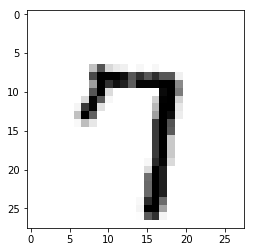

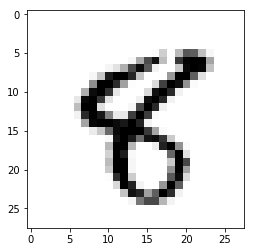

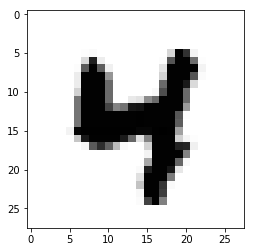

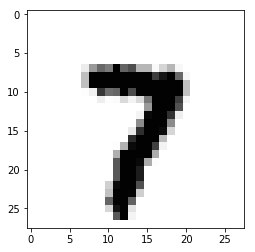

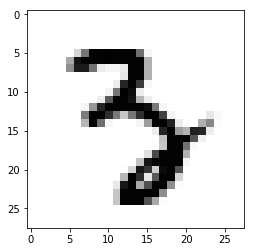

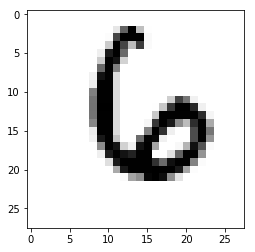

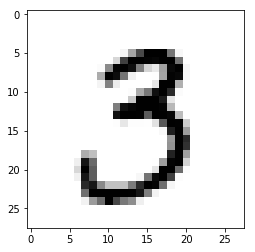

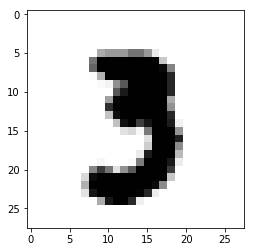

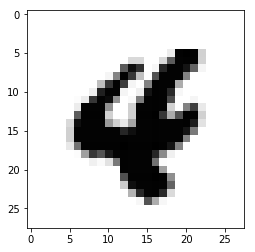

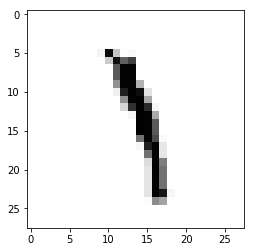

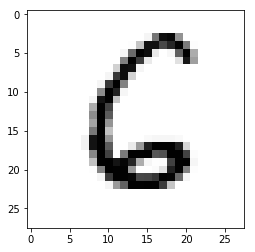

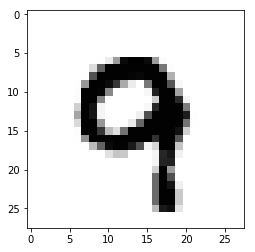

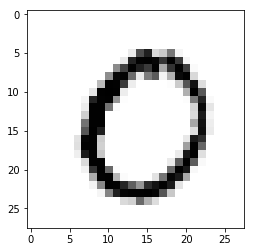

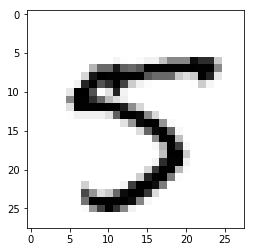

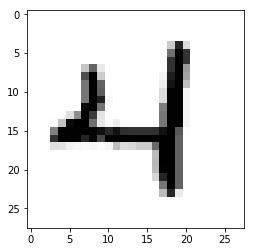

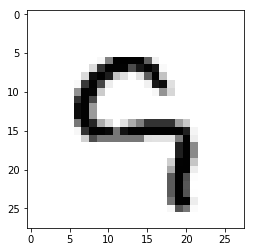

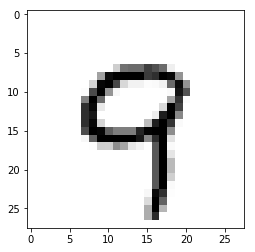

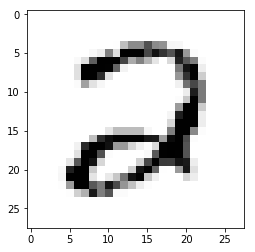

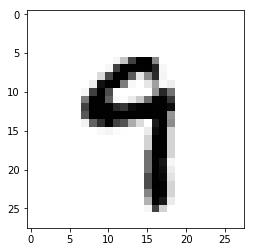

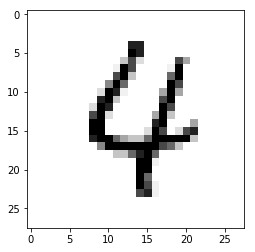

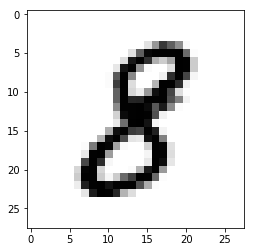

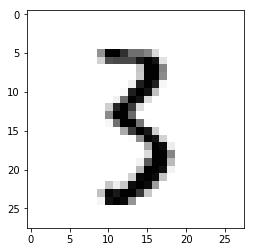

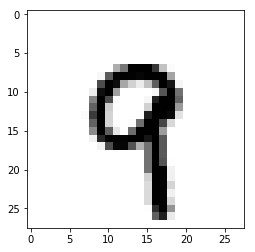

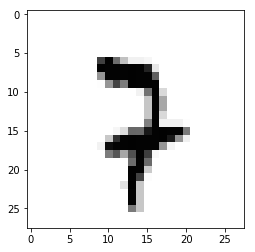

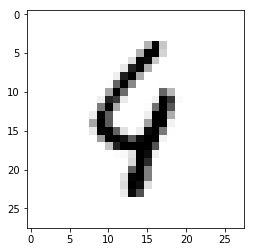

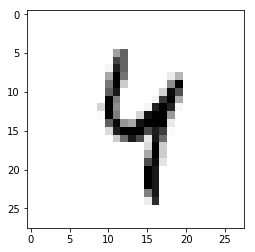

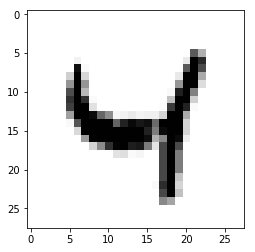

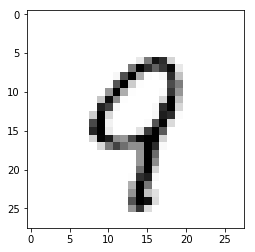

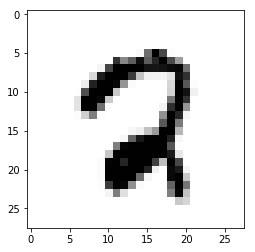

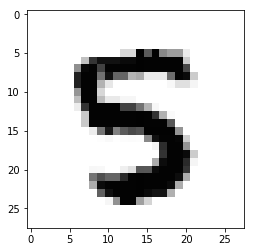

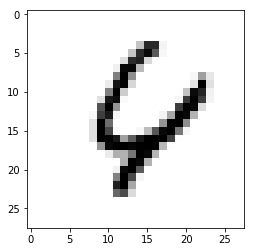

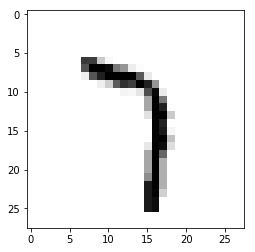

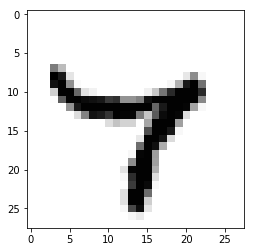

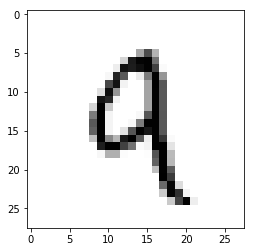

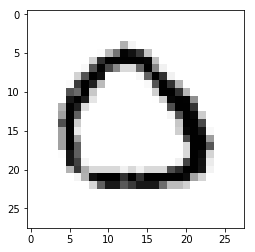

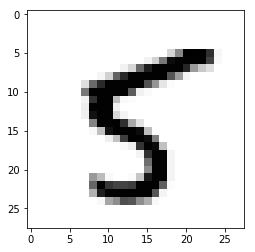

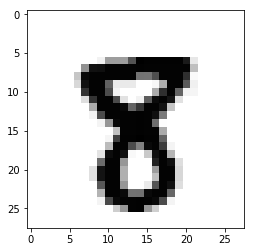

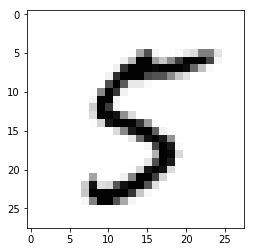

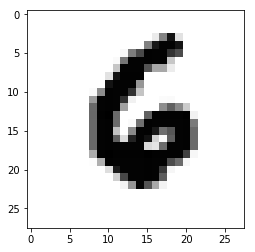

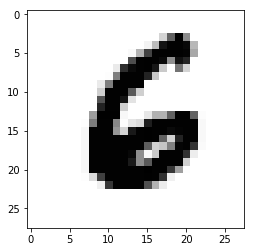

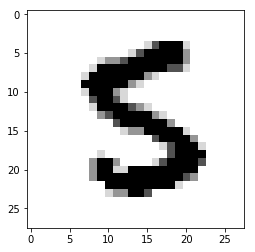

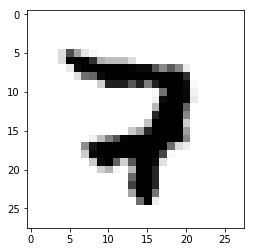

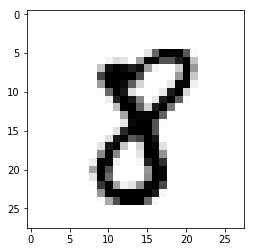

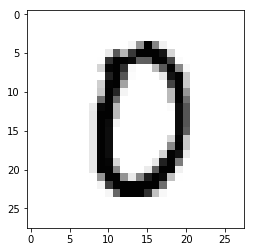

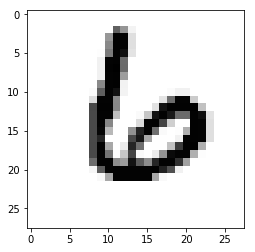

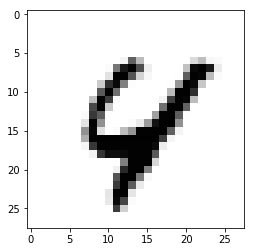

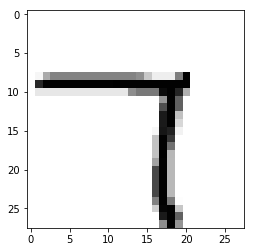

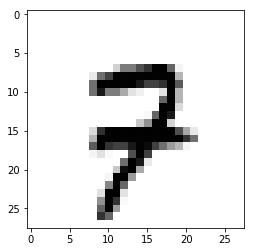

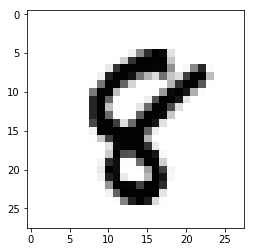

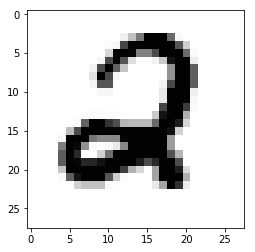

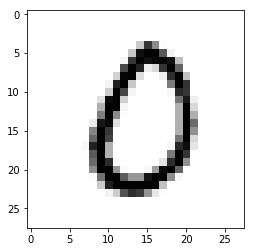

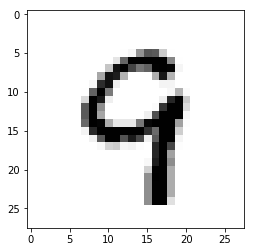




 * 5 th cluster
accuracy score of this cluster: 0.3221476510067114
This cluster is classified as [ 6 ]


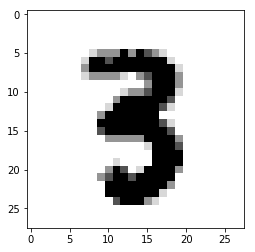

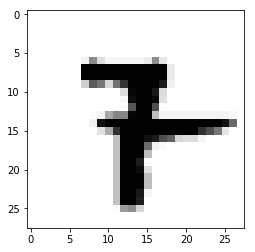




 * 6 th cluster
accuracy score of this cluster: 0.3356164383561644
This cluster is classified as [ 2 ]


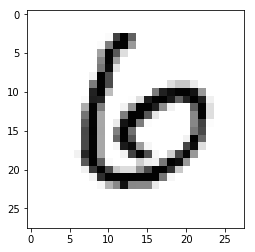

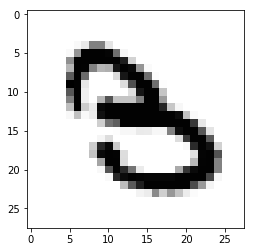

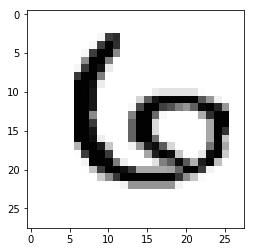

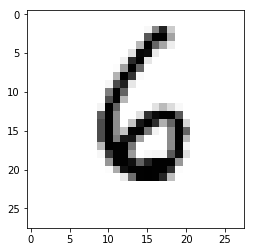




 * 7 th cluster
accuracy score of this cluster: 0.3046875
This cluster is classified as [ 6 ]



 * 8 th cluster
accuracy score of this cluster: 0.3333333333333333
This cluster is classified as [ 6 ]



 * 9 th cluster
accuracy score of this cluster: 0.30158730158730157
This cluster is classified as [ 2 ]


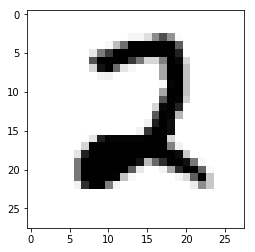




 * 10 th cluster
accuracy score of this cluster: 0.5934065934065934
This cluster is classified as [ 1 ]


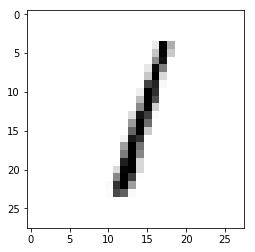

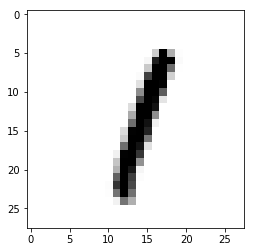

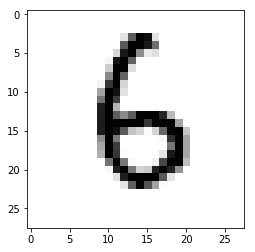

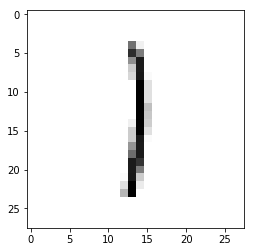

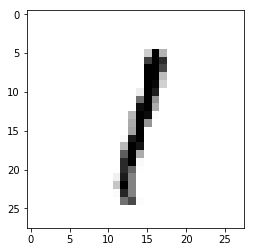

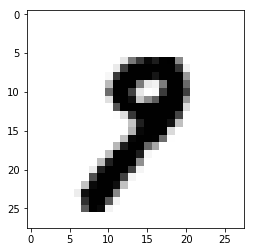

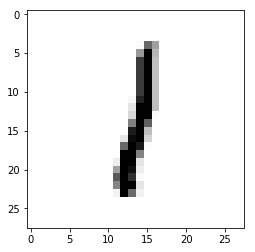

########################## 4 iteration##########################
4 th iteration of energy : 6751574.798958292
4 th iteration of accuracy score : 0.34377753782097664
4 th iteration of centroid : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



 * 1 th cluster
accuracy score of this cluster: 0.2642857142857143
This cluster is classified as [ 0 ]



 * 2 th cluster
accuracy score of this cluster: 0.40226489414081734
This cluster is classified as [ 0 ]



 * 3 th cluster
accuracy score of this cluster: 0.2676056338028169
This cluster is classified as [ 0 ]



 * 4 th cluster
accuracy score of this cluster: 0.14897522178036096
This cluster is classified as [ 0 ]



 * 5 th cluster
accuracy score of this cluster: 0.3221476510067114
This cluster is classified as [ 0 ]



 * 6 th cluster
accuracy score of this cluster: 0.3356164383561644
This cluster is classified as [ 0 ]



 * 7 th c

C:\Users\cal_00\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars


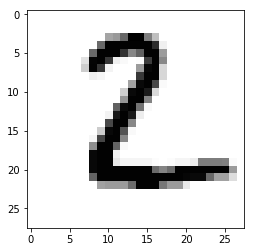

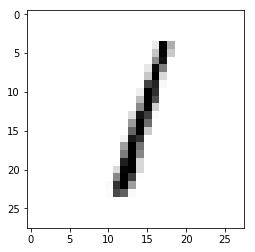

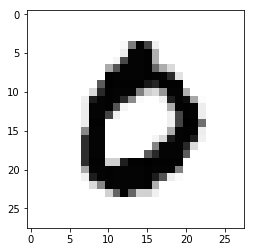

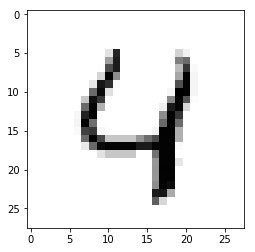

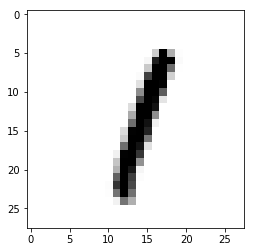

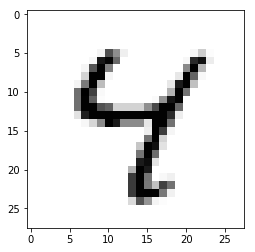

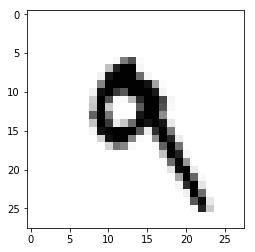

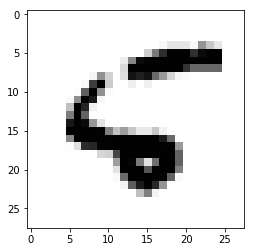

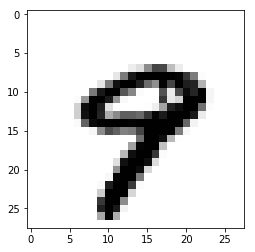

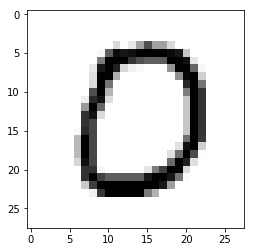

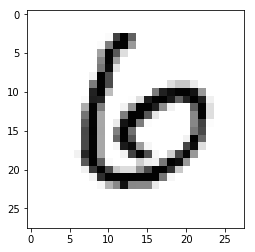

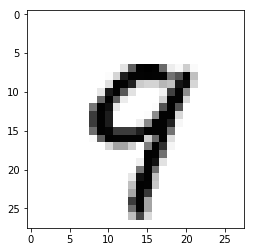

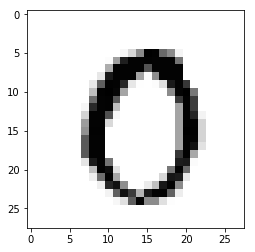

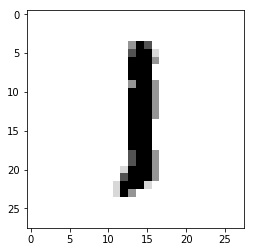

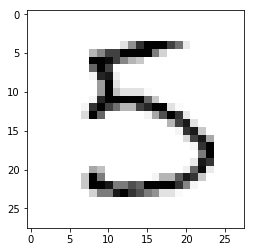

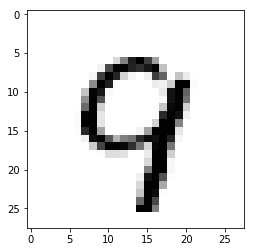

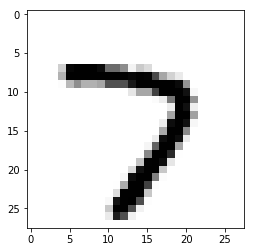

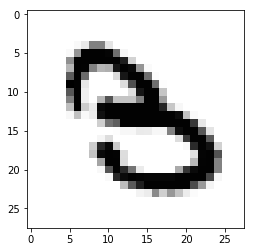

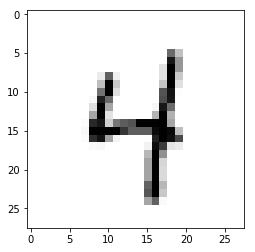

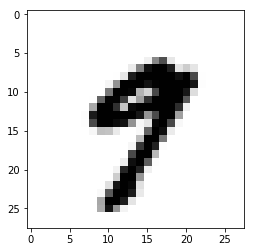

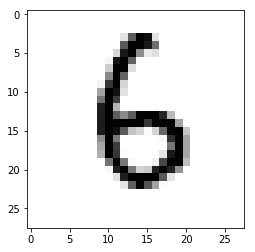

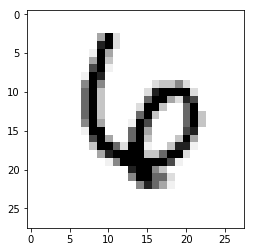

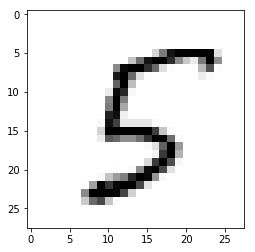

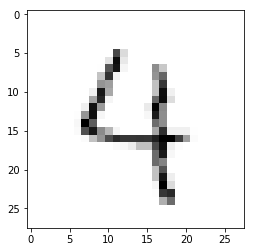

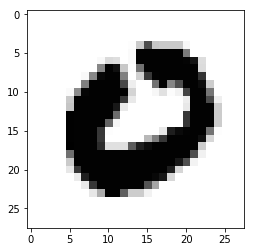

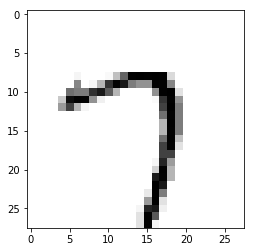

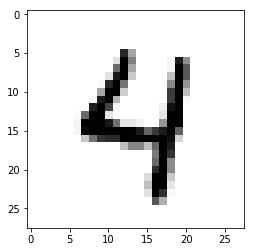

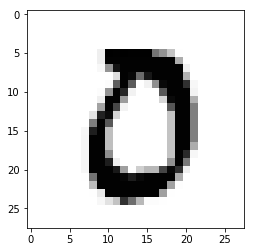

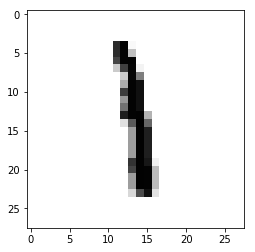

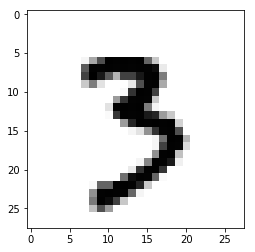

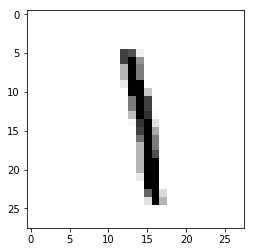

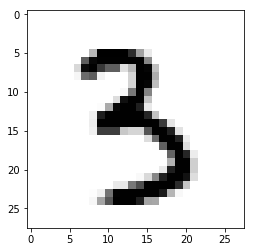

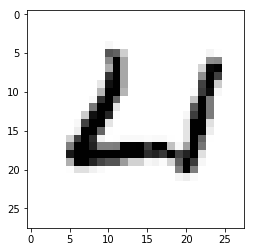

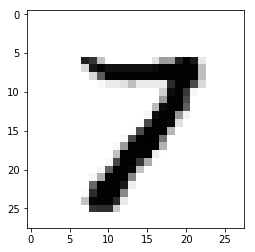

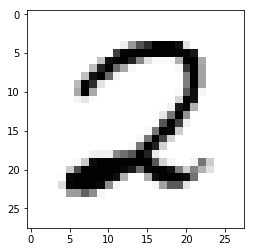

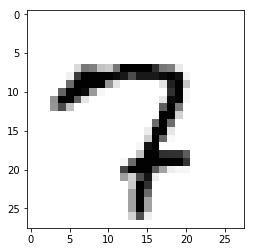

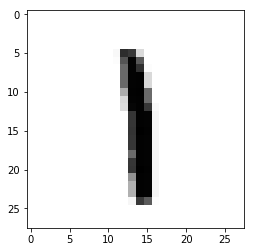

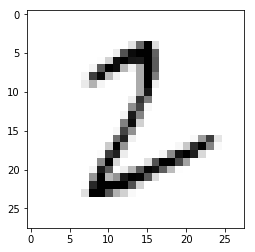

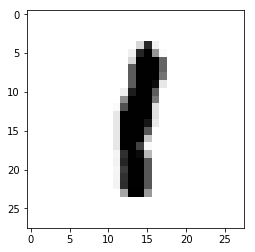

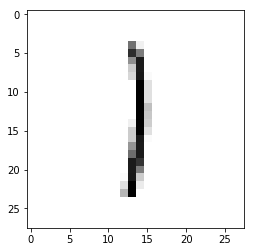

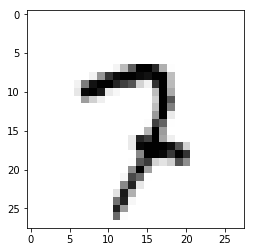

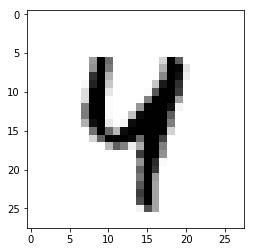

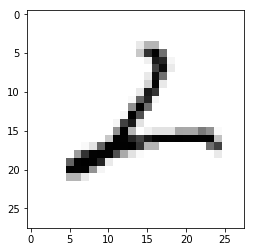

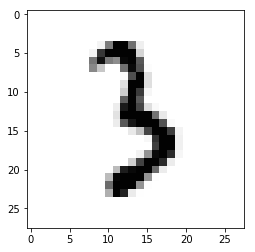

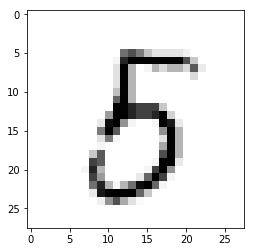

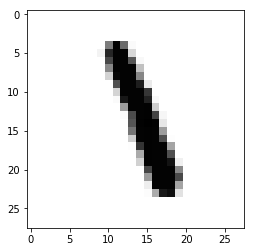

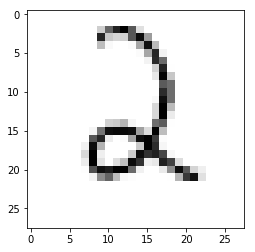

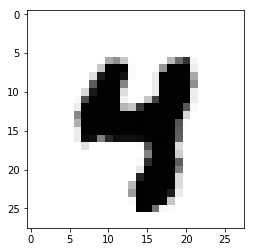

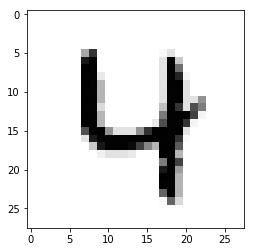

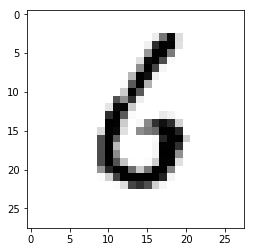

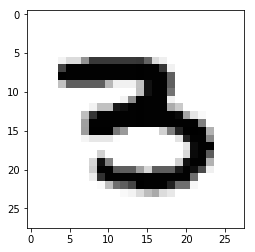

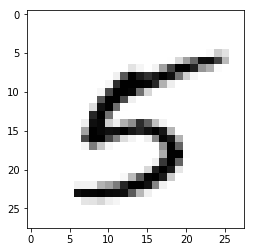

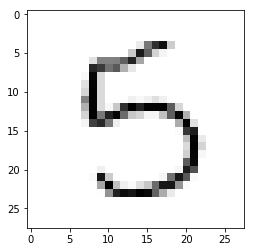

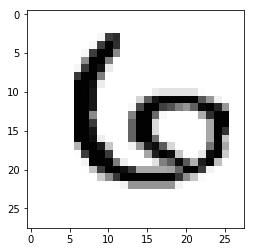

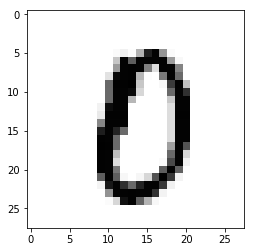

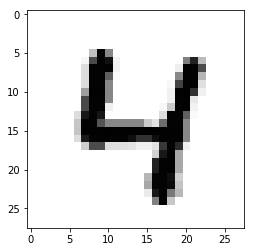

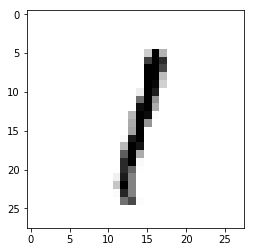

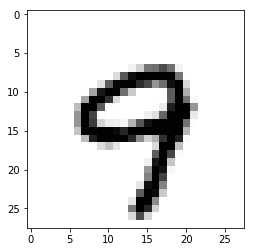

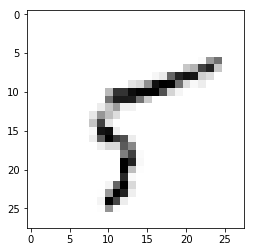

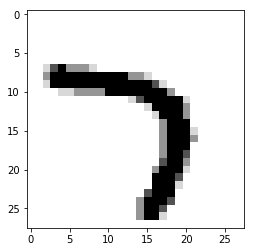

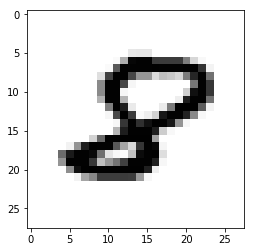

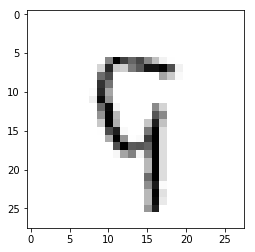

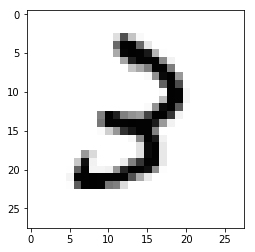

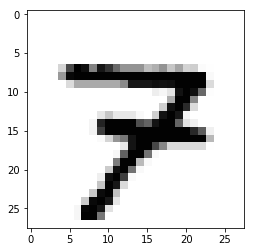

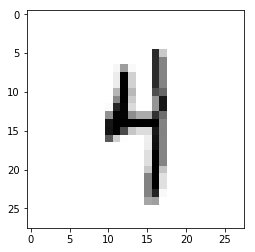

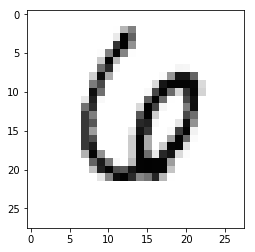

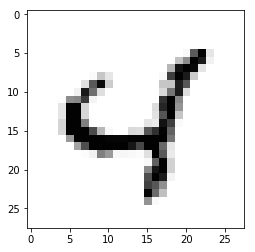

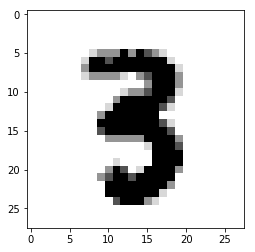

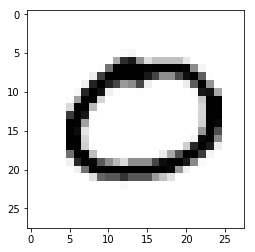

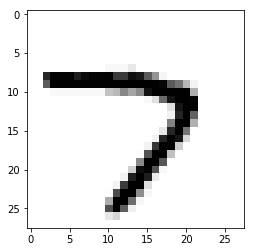

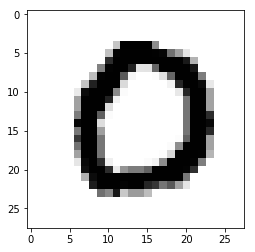

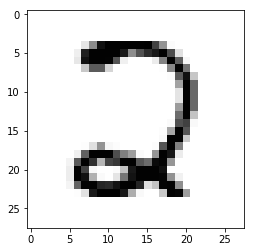

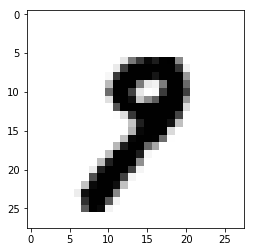

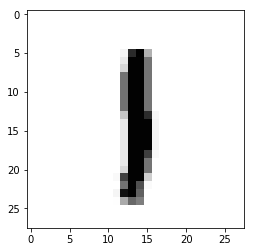

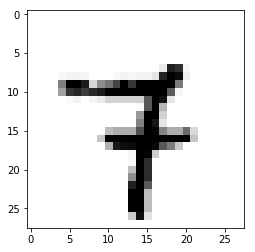

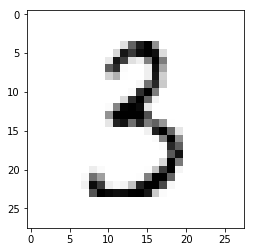

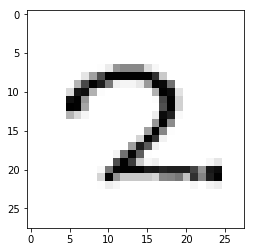

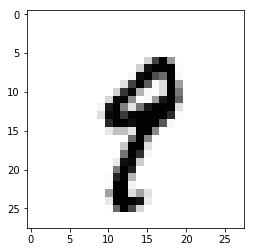

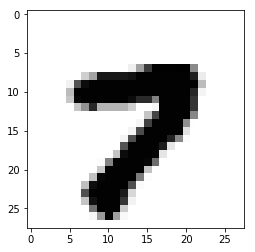

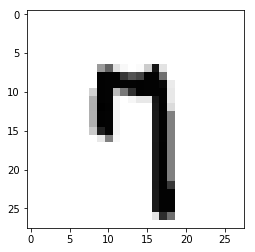

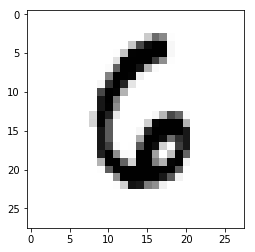

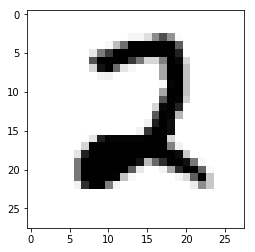

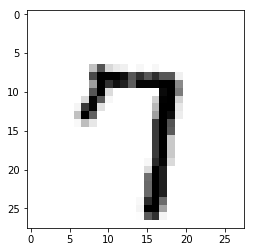

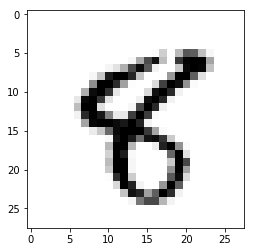

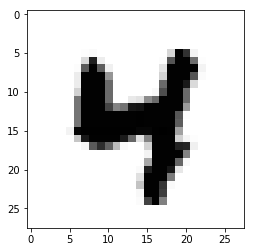

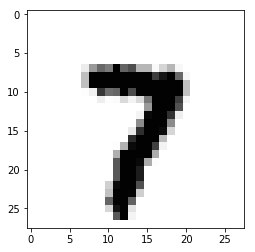

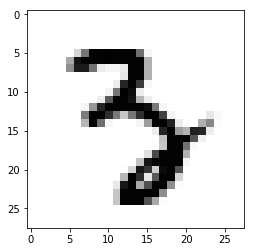

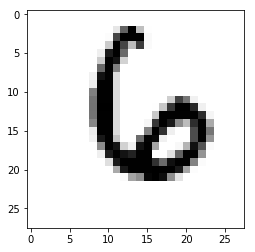

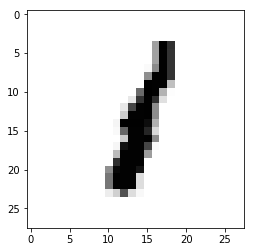

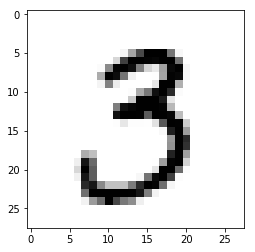

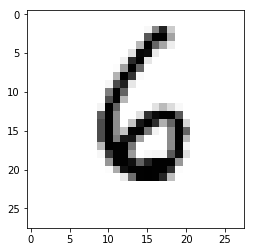

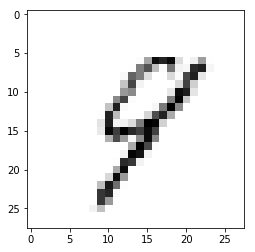

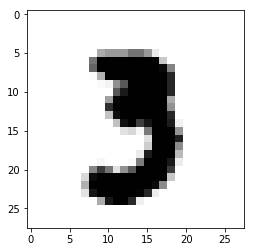

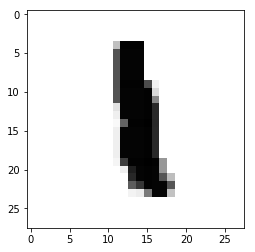

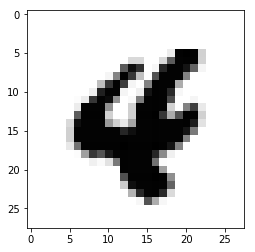

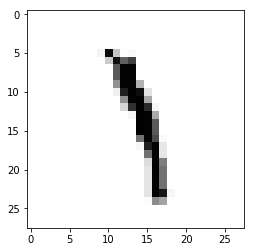

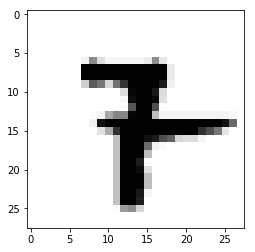

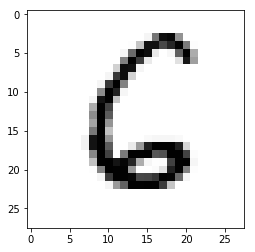

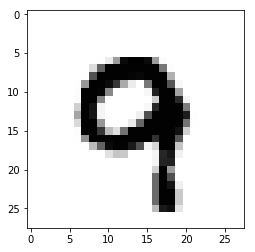

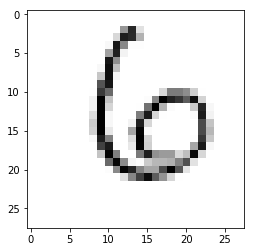

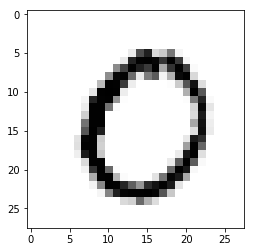

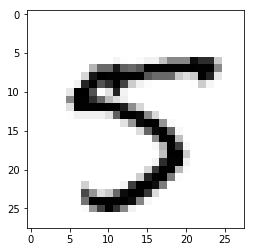

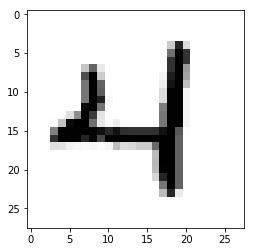

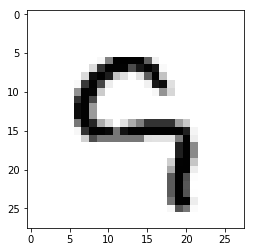

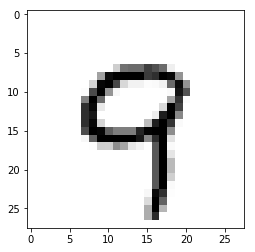

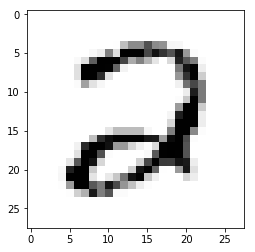

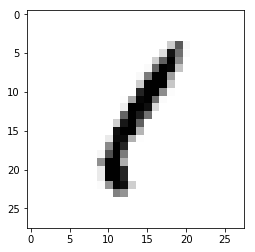

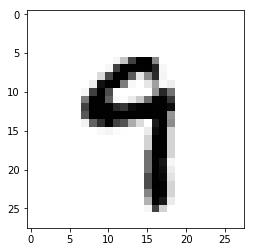

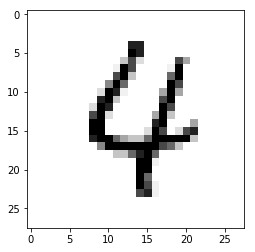

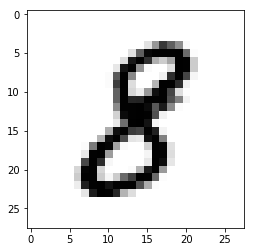

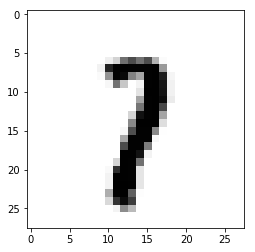

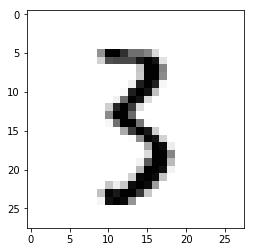

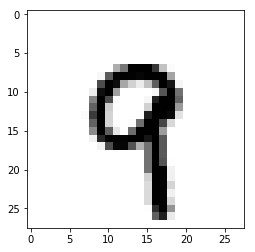

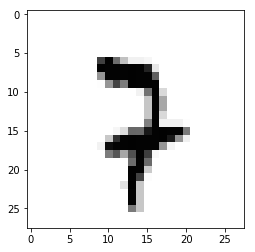

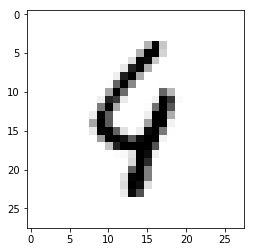

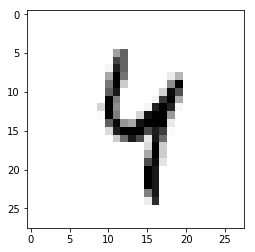

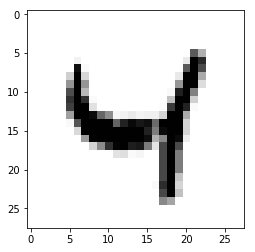

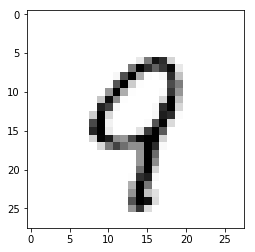

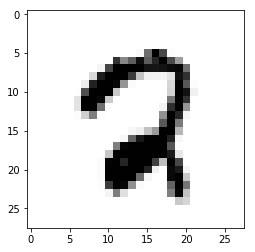

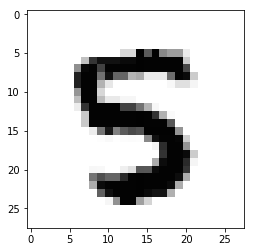

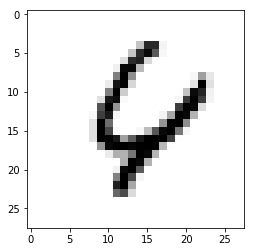

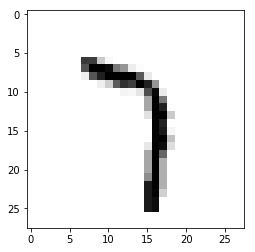

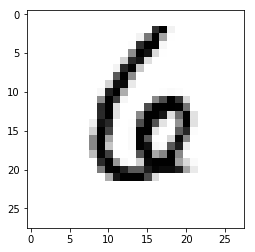

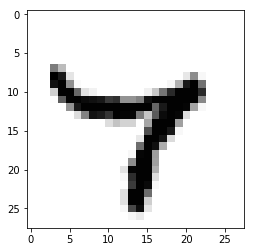

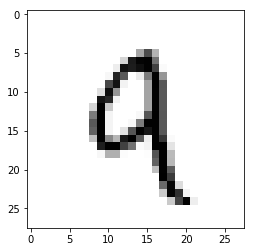

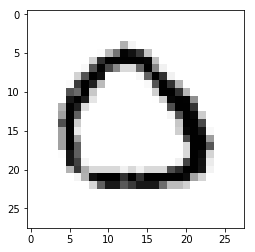

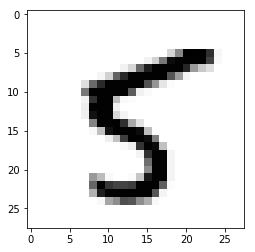

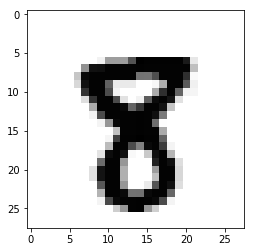

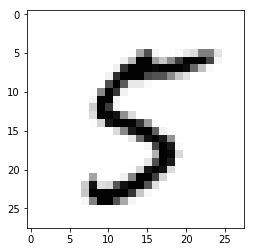

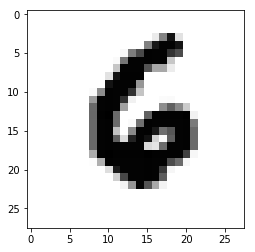

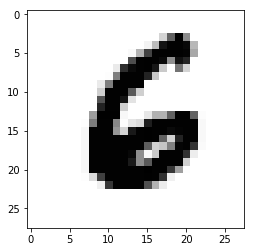

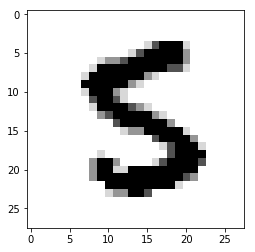

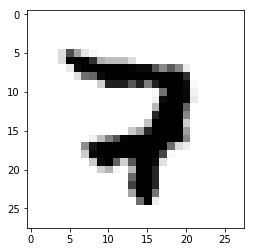

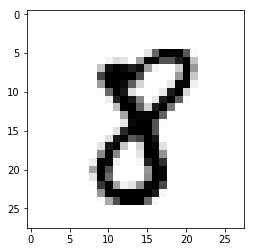

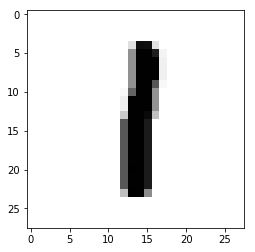

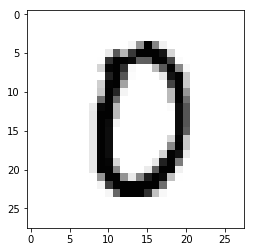

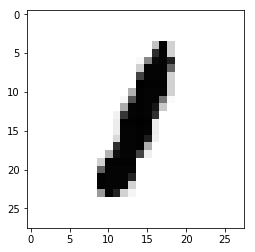

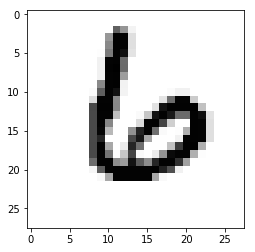

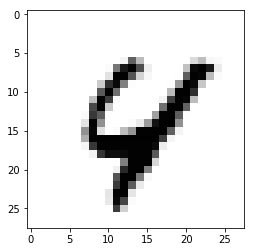

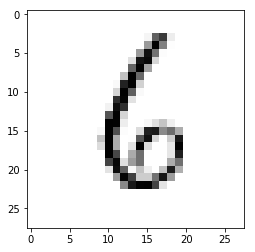

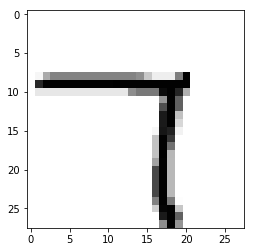

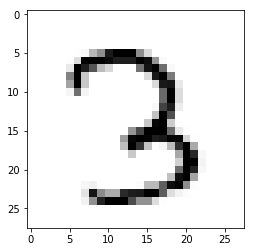

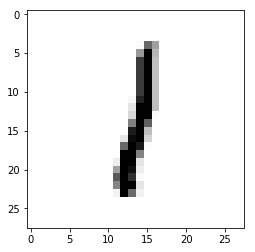

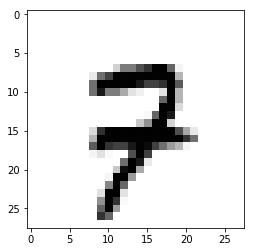

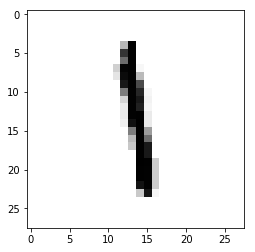

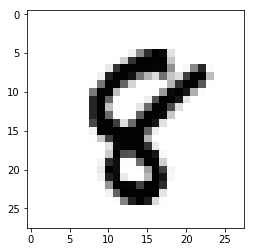

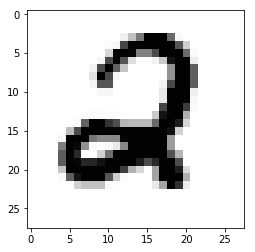

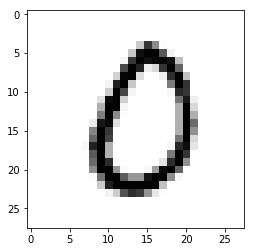

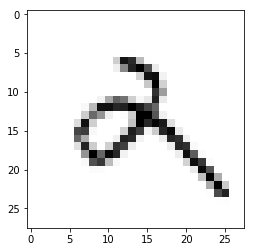

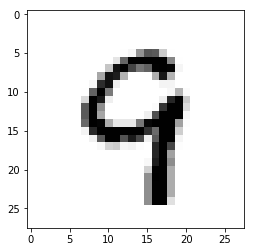

In [14]:
mnist_data=pd.read_csv('mnist_test.csv')
a=KMeans(mnist_data, 10)
a.activate()